In [2]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import decomposition
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import pandas as pd
import calendar
import sklearn.preprocessing as pre_processing
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import os
import numpy as np
from matplotlib.font_manager import *
from sklearn.ensemble import RandomForestClassifier
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用黑体显示中文
plt.rcParams['axes.unicode_minus'] = False   #解决保存图像是负号‘-’显示为方块的问题
sns.set(font='SimHei') #解决Seaborn中文显示问题
%matplotlib inline

In [3]:
os.getcwd()

'K:\\货车油耗预测\\can-GPS 论文\\单车日报表\\.ipynb_checkpoints'

In [4]:
'''
for day in range(1,32):
    datasets = pd.read_excel('..\【07%s】单车日报表.xlsx' % day)
    datasets['日期y/m/d'] = np.nan
    datasets['日期y/m/d'] = datasets['日期y/m/d'].fillna( '07%s' % day)
    datasets.to_excel('.\【07%s】单车日报表.xlsx' % day, index=False)
    
 '''   
    
    
    
    

"\nfor day in range(1,32):\n    datasets = pd.read_excel('..\\【07%s】单车日报表.xlsx' % day)\n    datasets['日期y/m/d'] = np.nan\n    datasets['日期y/m/d'] = datasets['日期y/m/d'].fillna( '07%s' % day)\n    datasets.to_excel('.\\【07%s】单车日报表.xlsx' % day, index=False)\n    \n "

In [5]:
'''
for day in range(1,32):
    datasets = pd.read_excel('..\【08%s】单车日报表.xlsx' % day)
    datasets['日期y/m/d'] = np.nan
    datasets['日期y/m/d'] = datasets['日期y/m/d'].fillna( '08%s' % day)
    datasets.to_excel('.\【08%s】单车日报表.xlsx' % day, index=False)
'''    

"\nfor day in range(1,32):\n    datasets = pd.read_excel('..\\【08%s】单车日报表.xlsx' % day)\n    datasets['日期y/m/d'] = np.nan\n    datasets['日期y/m/d'] = datasets['日期y/m/d'].fillna( '08%s' % day)\n    datasets.to_excel('.\\【08%s】单车日报表.xlsx' % day, index=False)\n"

In [6]:
'''
for day in range(10,31):
    datasets = pd.read_excel('..\【09%s】单车日报表.xlsx' % day)
    datasets['日期y/m/d'] = np.nan
    datasets['日期y/m/d'] = datasets['日期y/m/d'].fillna( '09%s' % day)
    datasets.to_excel('.\【09%s】单车日报表.xlsx' % day, index=False)
'''  

"\nfor day in range(10,31):\n    datasets = pd.read_excel('..\\【09%s】单车日报表.xlsx' % day)\n    datasets['日期y/m/d'] = np.nan\n    datasets['日期y/m/d'] = datasets['日期y/m/d'].fillna( '09%s' % day)\n    datasets.to_excel('.\\【09%s】单车日报表.xlsx' % day, index=False)\n"

In [7]:
'''
for mon in range(7,10):
    if mon < 9:
        for day in range(calendar.mdays[8] + 1):
            if day == 0:
                del day
            else:
                datasets = pd.read_excel('..\【0%s%s】单车日报表.xlsx' %  (mon,day))
                print('%s月の第%s天の维度'% (mon,day) + str(datasets.shape))
    else:
        for day in range(calendar.mdays[9] + 1):
            if day == 0:
                del day
            else:
                if day <10:
                    datasets = pd.read_excel('..\【0%s0%s】单车日报表.xlsx' %  (mon,day))
                    print('%s月の第%s天の维度'% (mon,day) + str(datasets.shape))
                    day += 1
                else:
                    datasets = pd.read_excel('..\【0%s%s】单车日报表.xlsx' %  (mon,day))
                    print('%s月の第%s天の维度'% (mon,day) + str(datasets.shape))
    
 '''                   

"\nfor mon in range(7,10):\n    if mon < 9:\n        for day in range(calendar.mdays[8] + 1):\n            if day == 0:\n                del day\n            else:\n                datasets = pd.read_excel('..\\【0%s%s】单车日报表.xlsx' %  (mon,day))\n                print('%s月の第%s天の维度'% (mon,day) + str(datasets.shape))\n    else:\n        for day in range(calendar.mdays[9] + 1):\n            if day == 0:\n                del day\n            else:\n                if day <10:\n                    datasets = pd.read_excel('..\\【0%s0%s】单车日报表.xlsx' %  (mon,day))\n                    print('%s月の第%s天の维度'% (mon,day) + str(datasets.shape))\n                    day += 1\n                else:\n                    datasets = pd.read_excel('..\\【0%s%s】单车日报表.xlsx' %  (mon,day))\n                    print('%s月の第%s天の维度'% (mon,day) + str(datasets.shape))\n    \n "

In [8]:
'''
#合并所有的文件
df_conbine = pd.DataFrame()
for mon in range(7,10):
    for day in range(calendar.mdays[8] + 1):
        if day == 0:
            del day
        else:
            print(mon,day)
            try:
                df1_conbine = pd.read_excel('.\【0%s%s】单车日报表.xlsx' %  (mon,day))
                df_conbine = df_conbine.append(df1_conbine, ignore_index=True)
                print(df_conbine.shape)
            except:
                pass
'''

"\n#合并所有的文件\ndf_conbine = pd.DataFrame()\nfor mon in range(7,10):\n    for day in range(calendar.mdays[8] + 1):\n        if day == 0:\n            del day\n        else:\n            print(mon,day)\n            try:\n                df1_conbine = pd.read_excel('.\\【0%s%s】单车日报表.xlsx' %  (mon,day))\n                df_conbine = df_conbine.append(df1_conbine, ignore_index=True)\n                print(df_conbine.shape)\n            except:\n                pass\n"

In [9]:
#f_conbine.to_excel('df_conbine7_9.xlsx', index=False)

# Step 1:环境准备（导入相关库）

In [10]:
## 基础工具
import numpy as np
import pandas as pd
import warnings
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.special import jn
from IPython.display import display, clear_output
import time

warnings.filterwarnings('ignore')
%matplotlib inline

## 数据处理
from sklearn import preprocessing

## 数据降维处理的
from sklearn.decomposition import PCA,FastICA,FactorAnalysis,SparsePCA

## 模型预测的
import lightgbm as lgb
import xgboost as xgb

## 参数搜索和评价的
from sklearn.model_selection import GridSearchCV,cross_val_score,StratifiedKFold,train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error


# Step 2:数据读取

In [11]:
#datasets = pd.read_excel('.\df_conbine7_9.xlsx')
#from functools import reduce
#from six.moves import reduce
#from Reduce_fastload import reduce_fastload
#datasets = reduce_fastload('.\df_conbine7_9.xlsx',use_feature = True)

In [12]:
#datasets.to_pickle('.\df_conbine7_9.pkl')

In [13]:
datasets = pd.read_pickle('.\df_conbine7_9.pkl')

In [14]:
y_data = datasets['全里程百公里油耗（L）']

In [15]:
#一共是103维度，现在为了设计训练与测试集，将'全里程百公里油耗（L）'作为目标变量提出来
df_cols = datasets.columns
df_cols = list(df_cols)
df_cols.remove('全里程百公里油耗（L）')

In [16]:
## 1) 载入训练集和测试集；
x_data = datasets[df_cols]
y_data = datasets['全里程百公里油耗（L）']
x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,test_size = 0.25)
## 输出数据的大小信息
print('Train data shape:',x_train.shape)
print('TestA data shape:',y_test.shape)


Train data shape: (205811, 102)
TestA data shape: (68604,)


In [17]:
## 1) 载入训练集和测试集；
#x_data = datasets[df_cols]
#y_data = datasets['全里程百公里油耗（L）']
Train_data,Test_data = train_test_split(datasets,test_size = 0.25)
## 输出数据的大小信息
print('Train data shape:',Train_data.shape)
print('TestA data shape:',Test_data.shape)

Train data shape: (205811, 103)
TestA data shape: (68604, 103)


In [18]:
#1) 数据简要浏览
## 通过.head() 简要浏览读取数据的形式
Train_data.head()

,日期y/m/d,车牌号,配属单位,使用单位,车辆名称,规格型号,登记日期,吨位,当日有派车次数,全天行驶里程km,...,里程与时速组合异常,全里程与任务里程组合异常,数据异常项数,任务里程误差率,任务里程超限异常,任务数据组合异常标记（设备）,任务数据组合异常标记（邮包）,任务数量,派车次数误差,设备分类
218850,912,京QZ37X1,北京市昌平区邮政局,北京市昌平区邮政局,东南得利卡,东南牌DN5020XYZ52,2016-07-22,1.0,0.0,37.8,...,NaN,NaN,1.0,NaN,无任务,无任务,无任务,0.0,0.0,NaN
138489,815,京AGX551,北京邮区中心局,报纸二队,东风,（集团）DFH5120XYZEX,2019-03-21,5.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138777,815,京AGN108,北京邮区中心局,四分局二队,东风,（集团）DFH5120XYZEX,2019-05-22,5.0,1.0,89.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39426,714,京Q7ZE90,北京报刊零售公司,昌平分公司,东南得利卡,东南牌DN5020XYZ5(2座),2015-10-29,1.0,0.0,109.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22659,78,京AR9320,北京市顺义区邮政局,北京市顺义区邮政局,江铃,鸿雁牌MS5064XYZJ,2014-11-25,3.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
#jupyter notebook显示最大行列数
#pd.set_option('display.max_columns',200)
#pd.set_option('display.max_rows',1000000)

In [20]:
#2) 数据信息查看
## 通过 .info() 简要可以看到对应一些数据列名，以及NAN缺失信息
#a = Train_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 205811 entries, 218850 to 196491
Columns: 103 entries, 日期y/m/d to 设备分类
dtypes: datetime64[ns](1), float64(58), int64(1), object(43)
memory usage: 163.3+ MB


In [21]:
#选择含NaN的列
#Train_data.loc[:,Train_data.isnull().any()].columns.to_list

<bound method IndexOpsMixin.tolist of Index(['车牌号', '配属单位', '使用单位', '车辆名称', '规格型号', '登记日期', '吨位', '当日有派车次数',
       '全天行驶里程km', '其中任务行驶里程km',
       ...
       '里程与时速组合异常', '全里程与任务里程组合异常', '数据异常项数', '任务里程误差率', '任务里程超限异常',
       '任务数据组合异常标记（设备）', '任务数据组合异常标记（邮包）', '任务数量', '派车次数误差', '设备分类'],
      dtype='object', length=102)>

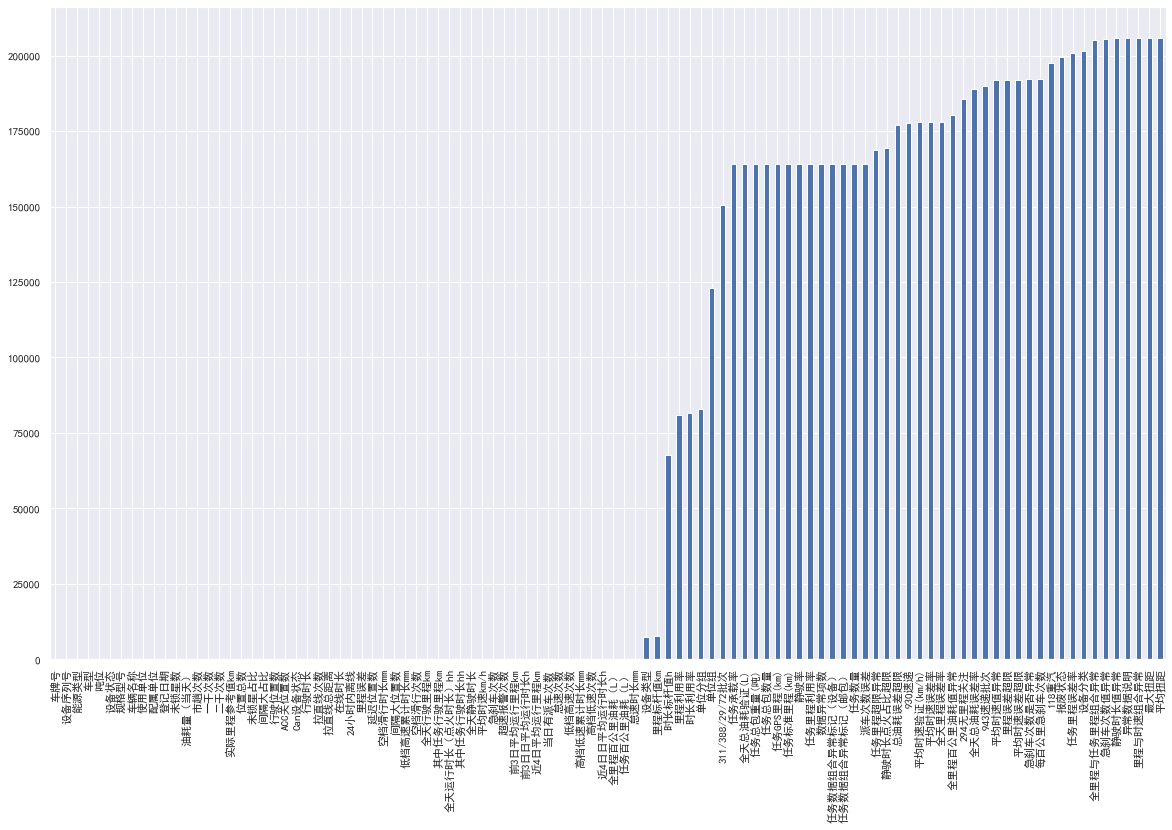

In [22]:
'''
# nan可视化
missing = Train_data.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
plt.figure(figsize=(20,12))
missing.plot.bar()
plt.savefig('./测试集中含nan列的可视化.jpg')
'''

In [23]:
#车牌号为空是缺失数据
print(Train_data['车牌号'].shape) #(205811,)
#Train_data.loc[Train_data['车牌号'].isnull()]

(205811,)


In [24]:

#print(Train_data['车牌号'].shape)

In [25]:
## 通过Pandas对于数据进行读取 (pandas是一个很友好的数据读取函数库)
#Train_data = pd.read_csv('datalab/231784/used_car_train_20200313.csv', sep=' ')
#TestA_data = pd.read_csv('datalab/231784/used_car_testA_20200313.csv', sep=' ')


'''


path = './data/'
## 1) 载入训练集和测试集；
Train_data = pd.read_csv(path+'train.csv', sep=' ')
TestA_data = pd.read_csv(path+'testA.csv', sep=' ')

## 输出数据的大小信息
print('Train data shape:',Train_data.shape)
print('TestA data shape:',TestA_data.shape)
Train data shape: (150000, 31)
TestA data shape: (50000, 30)
    
    

#载入维度数据
x_data = datasets[[ '吨位', '当日有派车次数',
                   '全天行驶里程km', '其中任务行驶里程km', '全天运行时长（点火时长）hh', '其中任务行驶时长hh', '全天静驶时长',
                   '平均时速km/h', '最大扭距', '平均扭距', '急刹车次数', '超速报警次数', '前3日平均运行里程km', '前3日日平均运行时长h',
                   '近4日平均运行里程km', '近4日日平均运行时长h', '怠速次数', '怠速时长mm', '任务百公里油耗（L）', '全里程百公里油耗（L）'
                   , '高档低速次数', '高档低速累计时长mm', '低档高速次数', '低档高速累计时长mm', '空档滑行次数', '空档滑行时长mm',
                   'Can设备状态',  '市趟次数', '一干次数', '二干次数', '里程标杆值km',
                  '实际里程参考值km', '位置总数', '未锁星数', '延迟位置数',
                   '行驶位置数', '间隔大位置数', 'ACC关位置数',  '行驶时长', '拉直线次数', '拉直线总距离', 
                   '设备类型', '在线时长', '里程误差']]



#分割数据1/4为测试，3/4为训练数据
#载入标签数据
y_data = datasets['全里程百公里油耗（L）']

x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,test_size = 0.3)
'''

"\n\n\npath = './data/'\n## 1) 载入训练集和测试集；\nTrain_data = pd.read_csv(path+'train.csv', sep=' ')\nTestA_data = pd.read_csv(path+'testA.csv', sep=' ')\n\n## 输出数据的大小信息\nprint('Train data shape:',Train_data.shape)\nprint('TestA data shape:',TestA_data.shape)\nTrain data shape: (150000, 31)\nTestA data shape: (50000, 30)\n    \n    \n\n#载入维度数据\nx_data = datasets[[ '吨位', '当日有派车次数',\n                   '全天行驶里程km', '其中任务行驶里程km', '全天运行时长（点火时长）hh', '其中任务行驶时长hh', '全天静驶时长',\n                   '平均时速km/h', '最大扭距', '平均扭距', '急刹车次数', '超速报警次数', '前3日平均运行里程km', '前3日日平均运行时长h',\n                   '近4日平均运行里程km', '近4日日平均运行时长h', '怠速次数', '怠速时长mm', '任务百公里油耗（L）', '全里程百公里油耗（L）'\n                   , '高档低速次数', '高档低速累计时长mm', '低档高速次数', '低档高速累计时长mm', '空档滑行次数', '空档滑行时长mm',\n                   'Can设备状态',  '市趟次数', '一干次数', '二干次数', '里程标杆值km',\n                  '实际里程参考值km', '位置总数', '未锁星数', '延迟位置数',\n                   '行驶位置数', '间隔大位置数', 'ACC关位置数',  '行驶时长', '拉直线次数', '拉直线总距离', \n                   '设备类型', '在线时长', '里程误差']]\n

In [26]:
#抽取出 '车牌号'特征 为 NaN 的样本：
#Train_data[np.isnan(Train_data['油耗量（当天）'])]

In [27]:
#3) 数据统计信息浏览
#显示所有列
pd.set_option('display.max_columns', None)
## 通过 .describe() 可以查看数值特征列的一些统计信息
Train_data.describe()


,日期y/m/d,吨位,当日有派车次数,全天行驶里程km,其中任务行驶里程km,全天运行时长（点火时长）hh,其中任务行驶时长hh,全天静驶时长,平均时速km/h,最大扭距,平均扭距,急刹车次数,超速报警次数,前3日平均运行里程km,前3日日平均运行时长h,近4日平均运行里程km,近4日日平均运行时长h,怠速次数,怠速时长mm,任务百公里油耗（L）,全里程百公里油耗（L）,高档低速次数,高档低速累计时长mm,低档高速次数,低档高速累计时长mm,空档滑行次数,空档滑行时长mm,Can设备状态,油耗量（当天）,市趟次数,一干次数,二干次数,里程标杆值km,时长标杆值h,实际里程参考值km,位置总数,未锁星数,延迟位置数,行驶位置数,间隔大位置数,ACC关位置数,行驶时长,拉直线次数,拉直线总距离,设备序列号,在线时长,里程误差,311/388/29/72批次,294无里程关注,每百公里急刹车次数,任务标准里程(km),任务GPS里程(km),任务总包数量,任务总包重量(吨),全天总油耗验证(L),平均时速验证(km/h),数据异常项数,任务数量,派车次数误差
count,205811.000000,205800.000000,205754.000000,205754.000000,205754.000000,205754.000000,205754.000000,205754.000000,205754.000000,0.0,0.0,205754.000000,205754.000000,205754.000000,205754.000000,205754.000000,205754.000000,205754.000000,205754.000000,205754.000000,205754.000000,205754.000000,205754.000000,205754.000000,205754.000000,205754.000000,205754.000000,205754.000000,205754.000000,205754.000000,205754.000000,205754.0,198143.000000,138028.000000,205754.000000,205754.000000,205754.000000,205754.000000,205754.000000,205754.000000,205754.000000,205754.000000,205754.000000,205754.000000,2.058000e+05,205754.000000,205754.000000,55292.000000,20336.0,13686.000000,41739.000000,41739.000000,41739.000000,41739.000000,41739.000000,27841.000000,41739.000000,41739.000000,41739.0
mean,602.408690,2.948414,0.261506,61.693122,17.810530,2.236157,0.307867,0.752842,24.534969,NaN,NaN,10.820232,0.002211,65.674323,2.404403,66.318754,2.426221,16.981590,26.806478,1.234678,6.414916,7.855405,12.942903,8.999329,2.306407,0.801603,0.405688,1.898709,6.078888,0.244423,0.017084,0.0,86.703636,8.014635,61.577294,750.417217,68.608994,6.626622,403.652279,1.047785,147.345369,1.483411,0.007844,1.389260,9.748400e+10,7.187426,-0.115829,316.864302,294.0,16.406995,21.710966,18.963519,33.208270,1.400814,6.530038,38.349289,0.908000,0.254750,0.0
std,340.650528,4.457208,1.017046,100.922050,85.924162,2.681633,1.351834,1.435724,60.894718,NaN,NaN,37.447999,0.067086,91.983986,2.476817,90.798175,2.432479,26.703157,48.150734,4.600999,11.977565,21.937634,60.210695,19.993728,5.494688,6.701379,4.223653,0.994955,17.155819,1.011294,0.141488,0.0,112.167699,4.360017,100.765338,799.809492,187.599654,48.146384,516.827353,3.400677,312.096695,1.813166,0.107355,206.288797,1.087149e+11,8.750332,6.581226,104.164485,0.0,40.658215,117.760990,100.087717,416.676945,8.823387,17.855990,93.487505,1.107659,0.983698,0.0
min,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,-1038.600000,29.000000,294.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,95.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.413133e+10,0.000000,-0.150000,311.000000,294.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29.176030,0.000000,0.000000,0.0
50%,728.000000,1.000000,0.000000,36.400000,0.000000,1.630000,0.000000,0.000000,28.000000,NaN,NaN,0.000000,0.000000,45.330000,2.010000,46.780000,2.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,93.735901,8.000000,36.270000,604.000000,3.000000,0.000000,206.000000,0.000000,1.000000,1.170000,0.000000,0.000000,6.478150e+10,3.670000,0.000000,311.000000,294.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.401460,0.000000,0.000000,0.0
75%,829.000000,5.000000,0.000000,85.000000,0.000000,3.53

In [28]:
#通过数据的统计信息，可以对于数据中的特征的变化情况有一个整体的了解。
Test_data.describe()


,日期y/m/d,吨位,当日有派车次数,全天行驶里程km,其中任务行驶里程km,全天运行时长（点火时长）hh,其中任务行驶时长hh,全天静驶时长,平均时速km/h,最大扭距,平均扭距,急刹车次数,超速报警次数,前3日平均运行里程km,前3日日平均运行时长h,近4日平均运行里程km,近4日日平均运行时长h,怠速次数,怠速时长mm,任务百公里油耗（L）,全里程百公里油耗（L）,高档低速次数,高档低速累计时长mm,低档高速次数,低档高速累计时长mm,空档滑行次数,空档滑行时长mm,Can设备状态,油耗量（当天）,市趟次数,一干次数,二干次数,里程标杆值km,时长标杆值h,实际里程参考值km,位置总数,未锁星数,延迟位置数,行驶位置数,间隔大位置数,ACC关位置数,行驶时长,拉直线次数,拉直线总距离,设备序列号,在线时长,里程误差,311/388/29/72批次,294无里程关注,每百公里急刹车次数,任务标准里程(km),任务GPS里程(km),任务总包数量,任务总包重量(吨),全天总油耗验证(L),平均时速验证(km/h),数据异常项数,任务数量,派车次数误差
count,68604.000000,68599.000000,68578.000000,68578.000000,68578.000000,68578.000000,68578.000000,68578.000000,68578.000000,0.0,0.0,68578.000000,68578.000000,68578.000000,68578.000000,68578.000000,68578.000000,68578.000000,68578.000000,68578.000000,68578.000000,68578.000000,68578.000000,68578.000000,68578.000000,68578.000000,68578.000000,68578.000000,68578.000000,68578.000000,68578.000000,68578.0,65986.000000,46019.000000,68578.000000,68578.000000,68578.000000,68578.000000,68578.000000,68578.000000,68578.000000,68578.000000,68578.000000,68578.000000,6.859900e+04,68578.000000,68578.000000,18308.000000,6674.0,4494.000000,13962.000000,13962.000000,13962.000000,13962.000000,13962.000000,9281.000000,13962.000000,13962.000000,13962.0
mean,602.192933,2.969807,0.259967,61.525769,17.832451,2.233592,0.307162,0.753299,24.471069,NaN,NaN,10.818309,0.002391,65.331004,2.395419,66.030485,2.418525,16.883199,26.825509,1.227489,6.404068,7.858847,13.033002,8.930371,2.293146,0.775117,0.395429,1.900435,6.125856,0.242775,0.017192,0.0,86.742478,8.014777,61.394360,747.090000,68.901266,6.785427,403.025373,1.050235,144.874391,1.480378,0.007903,0.341897,9.737511e+10,7.159430,-0.131409,315.852032,294.0,15.337089,22.194528,19.346720,43.492694,1.518262,6.652029,38.279844,0.903810,0.248747,0.0
std,341.052213,4.544193,1.052824,101.366990,87.485460,2.688928,1.369619,1.431288,60.272598,NaN,NaN,37.507080,0.069956,92.206323,2.487516,91.082177,2.443377,26.642459,48.637968,4.563195,11.923059,21.708694,61.163292,19.905111,5.475803,6.369368,4.035987,0.995170,17.649127,1.047141,0.142407,0.0,112.280142,4.367306,101.089496,784.500541,186.237339,50.572690,514.826097,3.387991,275.612435,1.816375,0.107989,11.116975,1.086310e+11,8.743776,8.516955,104.502870,0.0,39.440719,122.044190,104.513478,673.464235,12.649577,18.132098,82.909554,1.108595,1.120972,0.0
min,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,-1037.000000,29.000000,294.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,95.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.413133e+10,0.000000,-0.150000,311.000000,294.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29.149798,0.000000,0.000000,0.0
50%,728.000000,1.000000,0.000000,36.100000,0.000000,1.620000,0.000000,0.000000,28.000000,NaN,NaN,0.000000,0.000000,45.270000,1.980000,46.550000,2.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,93.735901,8.000000,36.000000,595.000000,3.000000,0.000000,204.000000,0.000000,0.000000,1.170000,0.000000,0.000000,6.478150e+10,3.630000,0.000000,311.000000,294.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.416667,0.000000,0.000000,0.0
75%,829.000000,5.000000,0.000000,84.700000,0.000000,3.550000,0.000000,1.020000,40.000000,NaN,NaN,0.0000

In [29]:
#Step 3: 数据分析（EDA）
#1) 提取数值类型特征列名
numerical_cols = Train_data.select_dtypes(exclude = 'object').columns
print(numerical_cols)

Index(['日期y/m/d', '登记日期', '吨位', '当日有派车次数', '全天行驶里程km', '其中任务行驶里程km',
       '全天运行时长（点火时长）hh', '其中任务行驶时长hh', '全天静驶时长', '平均时速km/h', '最大扭距', '平均扭距',
       '急刹车次数', '超速报警次数', '前3日平均运行里程km', '前3日日平均运行时长h', '近4日平均运行里程km',
       '近4日日平均运行时长h', '怠速次数', '怠速时长mm', '任务百公里油耗（L）', '全里程百公里油耗（L）', '高档低速次数',
       '高档低速累计时长mm', '低档高速次数', '低档高速累计时长mm', '空档滑行次数', '空档滑行时长mm', 'Can设备状态',
       '油耗量（当天）', '市趟次数', '一干次数', '二干次数', '里程标杆值km', '时长标杆值h', '实际里程参考值km',
       '位置总数', '未锁星数', '延迟位置数', '行驶位置数', '间隔大位置数', 'ACC关位置数', '行驶时长', '拉直线次数',
       '拉直线总距离', '设备序列号', '在线时长', '里程误差', '311/388/29/72批次', '294无里程关注',
       '每百公里急刹车次数', '任务标准里程(km)', '任务GPS里程(km)', '任务总包数量', '任务总包重量(吨)',
       '全天总油耗验证(L)', '平均时速验证(km/h)', '数据异常项数', '任务数量', '派车次数误差'],
      dtype='object')


In [30]:
#查看非数值的变量名称
categorical_cols = Train_data.select_dtypes(include = 'object').columns
categorical_cols = list(categorical_cols)
print(categorical_cols,'\n')

['车牌号', '配属单位', '使用单位', '车辆名称', '规格型号', '车型', '单位分组', '能源类型', '里程利用率', '时长利用率', '未锁星占比', '间隔大占比', '设备类型', '设备状态', '24小时内离线', '报废状态', '930速递', '118重汽', '急刹车次数是否异常', '单位组', '943速递批次', '异常数据说明', '静驶率', '任务里程利用率', '任务承载率', '全天里程误差率', '里程误差超限', '全天总油耗误差率', '总油耗误差超限', '全里程百公里油耗值异常', '平均时速误差率', '平均时速误差超限', '平均时速值异常', '静驶时长点火占比超限', '静驶时长值异常', '急刹车次数值异常', '里程与时速组合异常', '全里程与任务里程组合异常', '任务里程误差率', '任务里程超限异常', '任务数据组合异常标记（设备）', '任务数据组合异常标记（邮包）', '设备分类'] 



In [31]:
Train_data[numerical_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205811 entries, 218850 to 196491
Data columns (total 60 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   日期y/m/d          205811 non-null  int64         
 1   登记日期             205800 non-null  datetime64[ns]
 2   吨位               205800 non-null  float64       
 3   当日有派车次数          205754 non-null  float64       
 4   全天行驶里程km         205754 non-null  float64       
 5   其中任务行驶里程km       205754 non-null  float64       
 6   全天运行时长（点火时长）hh   205754 non-null  float64       
 7   其中任务行驶时长hh       205754 non-null  float64       
 8   全天静驶时长           205754 non-null  float64       
 9   平均时速km/h         205754 non-null  float64       
 10  最大扭距             0 non-null       float64       
 11  平均扭距             0 non-null       float64       
 12  急刹车次数            205754 non-null  float64       
 13  超速报警次数           205754 non-null  float64       
 14  前3日平均运行里程km    

In [32]:
from datetime import datetime
Train_data['date_parsed'] = pd.to_datetime(Train_data['日期y/m/d'],format = '%m%d')
Train_data = Train_data.drop('日期y/m/d',axis = 1)
#修改数据采集时间的格式（训练数据）
Train_data['date_parsed'] = Train_data['date_parsed'].apply(lambda x : x.strftime('2020-%m-%d')).astype('datetime64')
#Train_data['date_parsed']

In [33]:
from datetime import datetime
Test_data['date_parsed'] = pd.to_datetime(Test_data['日期y/m/d'],format = '%m%d')
Test_data = Test_data.drop('日期y/m/d',axis = 1)
#修改数据采集时间的格式（测试数据）
Test_data['date_parsed'] = Test_data['date_parsed'].apply(lambda x : x.strftime('2020-%m-%d')).astype('datetime64')
#Test_data['date_parsed']

In [34]:
#Train_data['日期y/m/d']
#日期处理好后重新提取数值类型特征列名
numerical_cols = Train_data.select_dtypes(exclude = 'object').columns
print(numerical_cols)
Train_data[numerical_cols].info()

Index(['登记日期', '吨位', '当日有派车次数', '全天行驶里程km', '其中任务行驶里程km', '全天运行时长（点火时长）hh',
       '其中任务行驶时长hh', '全天静驶时长', '平均时速km/h', '最大扭距', '平均扭距', '急刹车次数', '超速报警次数',
       '前3日平均运行里程km', '前3日日平均运行时长h', '近4日平均运行里程km', '近4日日平均运行时长h', '怠速次数',
       '怠速时长mm', '任务百公里油耗（L）', '全里程百公里油耗（L）', '高档低速次数', '高档低速累计时长mm', '低档高速次数',
       '低档高速累计时长mm', '空档滑行次数', '空档滑行时长mm', 'Can设备状态', '油耗量（当天）', '市趟次数',
       '一干次数', '二干次数', '里程标杆值km', '时长标杆值h', '实际里程参考值km', '位置总数', '未锁星数',
       '延迟位置数', '行驶位置数', '间隔大位置数', 'ACC关位置数', '行驶时长', '拉直线次数', '拉直线总距离',
       '设备序列号', '在线时长', '里程误差', '311/388/29/72批次', '294无里程关注', '每百公里急刹车次数',
       '任务标准里程(km)', '任务GPS里程(km)', '任务总包数量', '任务总包重量(吨)', '全天总油耗验证(L)',
       '平均时速验证(km/h)', '数据异常项数', '任务数量', '派车次数误差', 'date_parsed'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 205811 entries, 218850 to 196491
Data columns (total 60 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   登记日期 

In [35]:
Train_data[categorical_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205811 entries, 218850 to 196491
Data columns (total 43 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   车牌号             205800 non-null  object
 1   配属单位            205800 non-null  object
 2   使用单位            205800 non-null  object
 3   车辆名称            205800 non-null  object
 4   规格型号            205800 non-null  object
 5   车型              205800 non-null  object
 6   单位分组            122881 non-null  object
 7   能源类型            205800 non-null  object
 8   里程利用率           124994 non-null  object
 9   时长利用率           124218 non-null  object
 10  未锁星占比           205754 non-null  object
 11  间隔大占比           205754 non-null  object
 12  设备类型            198370 non-null  object
 13  设备状态            205800 non-null  object
 14  24小时内离线         205754 non-null  object
 15  报废状态            6271 non-null    object
 16  930速递           28080 non-null   object
 17  118重汽           8137 non

In [36]:
Test_data[numerical_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68604 entries, 240019 to 80255
Data columns (total 60 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   登记日期             68599 non-null  datetime64[ns]
 1   吨位               68599 non-null  float64       
 2   当日有派车次数          68578 non-null  float64       
 3   全天行驶里程km         68578 non-null  float64       
 4   其中任务行驶里程km       68578 non-null  float64       
 5   全天运行时长（点火时长）hh   68578 non-null  float64       
 6   其中任务行驶时长hh       68578 non-null  float64       
 7   全天静驶时长           68578 non-null  float64       
 8   平均时速km/h         68578 non-null  float64       
 9   最大扭距             0 non-null      float64       
 10  平均扭距             0 non-null      float64       
 11  急刹车次数            68578 non-null  float64       
 12  超速报警次数           68578 non-null  float64       
 13  前3日平均运行里程km      68578 non-null  float64       
 14  前3日日平均运行时长h      68578 non-null  

In [37]:
#查看非数值变量里种类

'''
for i in categorical_cols:
    print(i,':',set(Train_data[i]),'\n\n')
'''

"\nfor i in categorical_cols:\n    print(i,':',set(Train_data[i]),'\n\n')\n"

In [38]:
#由于数据特征可以分为 三种不同类型的特征，分别为时间特征，类别特征和数值类型特征 , 我们对于不同特征进行分类别处理。
date_features = ['登记日期', 'date_parsed']

categorical_features = [ '设备分类', '任务数据组合异常标记（邮包）', '任务数据组合异常标记（设备）', '任务里程超限异常', '全里程与任务里程组合异常', '里程与时速组合异常', '急刹车次数值异常', '静驶时长值异常',
                        '静驶时长点火占比超限','平均时速值异常','平均时速误差超限','全里程百公里油耗值异常','总油耗误差超限','里程误差超限','异常数据说明','943速递批次',
                       '单位组','急刹车次数是否异常','118重汽','930速递','报废状态','24小时内离线','设备状态','设备类型','能源类型','单位分组','车型','规格型号',
                       '车辆名称','使用单位','配属单位','车牌号']

numeric_features = [] 
for i in categorical_cols:
    if i not in  categorical_features:
        numeric_features.append(i)


In [39]:
'设备分类' in categorical_features

True

In [40]:
#a = Train_data['登记日期']
#a

In [41]:
#首先对于时间特征进行处理:
from tqdm import tqdm

def date_proc(x):
#    print(type(x))
    m = int(x[5:7])
    if m == 0:
        m = 1
#    print(m)
    return x[:4] + '-' + str(m) + '-' + x[8:]


def num_to_date(df,date_cols):
    for f in tqdm(date_cols):
#        df[f] = pd.to_datetime(df[f].astype('str').apply(date_proc))   #????出了问题
        df[f + '_year'] = df[f].dt.year
        df[f + '_month'] = df[f].dt.month
        df[f + '_day'] = df[f].dt.day
        df[f + '_dayofweek'] = df[f].dt.dayofweek
    return df
Train_data2 = num_to_date(Train_data,date_features)

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  4.64it/s]


In [42]:
'''
def date_proc(x):
#    print(type(x))
    m = int(x[5:7])
    
    if m == 0:
        m = 1
    print(m)
    return x[:4] + '-' + str(m) + '-' + x[8:]
x = '2020/03/12'
x = str(x)
date_proc(x)
'''
Train_data['登记日期_year']

218850    2016.0
138489    2019.0
138777    2019.0
39426     2015.0
22659     2014.0
           ...  
35486     2014.0
133979    2017.0
132224    2020.0
95215     2017.0
196491    2017.0
Name: 登记日期_year, Length: 205811, dtype: float64

In [43]:
#首先对于时间特征进行处理:
from tqdm import tqdm

def date_proc(x):
#    print(type(x))
    m = int(x[5:7])
    if m == 0:
        m = 1
#    print(m)
    return x[:4] + '-' + str(m) + '-' + x[8:]


def num_to_date(df,date_cols):
    for f in tqdm(date_cols):
#        df[f] = pd.to_datetime(df[f].astype('str').apply(date_proc))   #????出了问题
        df[f + '_year'] = df[f].dt.year
        df[f + '_month'] = df[f].dt.month
        df[f + '_day'] = df[f].dt.day
        df[f + '_dayofweek'] = df[f].dt.dayofweek
    return df
Test_data2 = num_to_date(Test_data,date_features)

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 18.53it/s]


<Figure size 432x288 with 0 Axes>

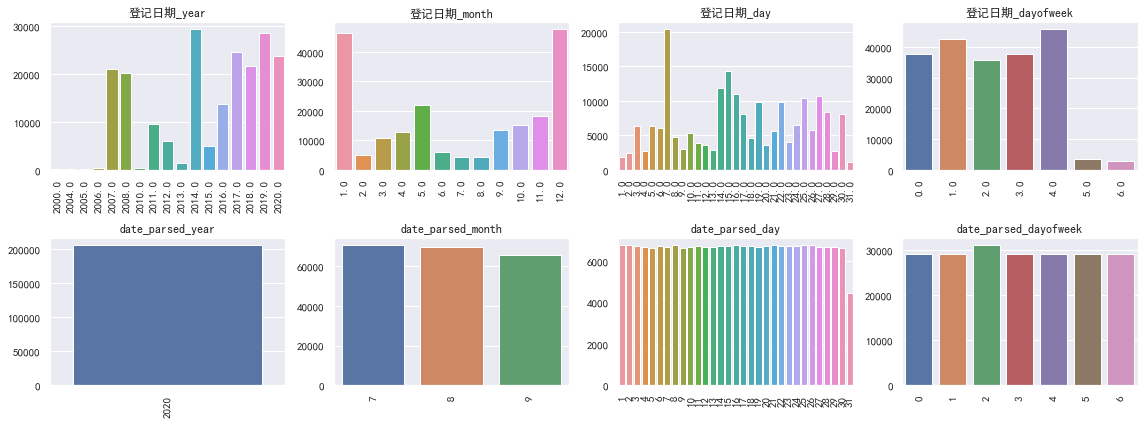

In [44]:
plt.figure()
plt.figure(figsize=(16, 6))
i = 1
for f in date_features:
    for col in ['year', 'month', 'day', 'dayofweek']:
        plt.subplot(2, 4, i)
        i += 1
        v = Train_data[f + '_' + col].value_counts()
        fig = sns.barplot(x=v.index, y=v.values)
        for item in fig.get_xticklabels():
            item.set_rotation(90)
        plt.title(f + '_' + col)
plt.tight_layout()
plt.show()


<Figure size 432x288 with 0 Axes>

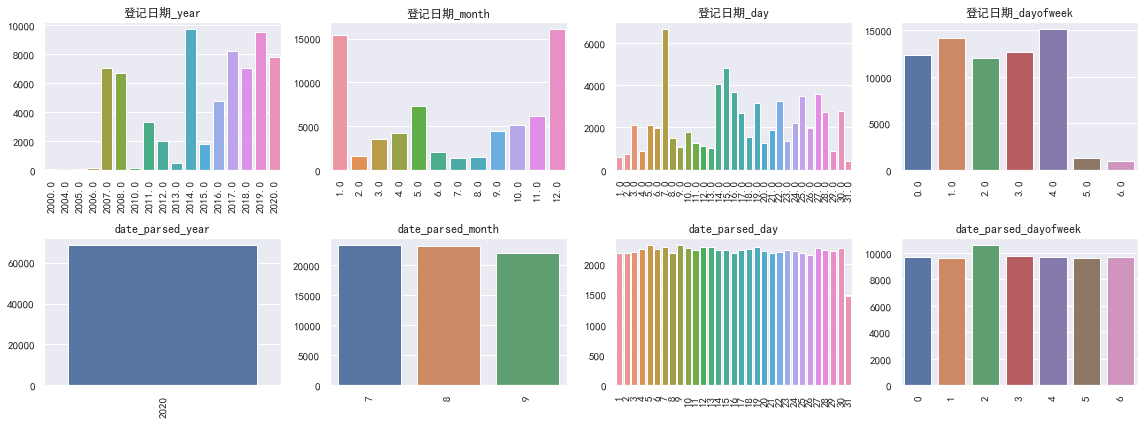

In [45]:
plt.figure()
plt.figure(figsize=(16, 6))
i = 1
for f in date_features:
    for col in ['year', 'month', 'day', 'dayofweek']:
        plt.subplot(2, 4, i)
        i += 1
        v = Test_data[f + '_' + col].value_counts()
        fig = sns.barplot(x=v.index, y=v.values)
        for item in fig.get_xticklabels():
            item.set_rotation(90)
        plt.title(f + '_' + col)
plt.tight_layout()
plt.show()


<Figure size 432x288 with 0 Axes>

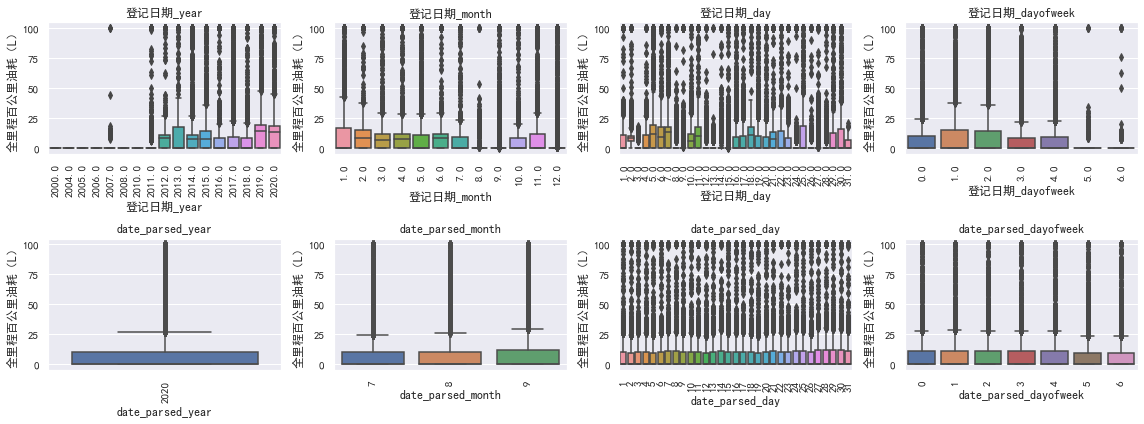

In [46]:
plt.figure()
plt.figure(figsize=(16, 6))
i = 1
for f in date_features:
    for col in ['year', 'month', 'day', 'dayofweek']:
        plt.subplot(2, 4, i)
        i += 1
        fig = sns.boxplot(x=Train_data[f + '_' + col], y=Train_data['全里程百公里油耗（L）'])
        for item in fig.get_xticklabels():
            item.set_rotation(90)
        plt.title(f + '_' + col)
plt.tight_layout()
plt.show()


In [47]:
#从上面时间分析更新数据特征，'date_parsed_year'没有价值
date_features = ['登记日期_year', '登记日期_month', '登记日期_day',
       '登记日期_dayofweek',  'date_parsed_month',
       'date_parsed_day', 'date_parsed_dayofweek']

In [48]:
'''
for i in categorical_features:
    if i in Train_data.columns:
        print(i)
    pass
'''

'\nfor i in categorical_features:\n    if i in Train_data.columns:\n        print(i)\n    pass\n'

In [49]:
'设备分类'  in categorical_features

True

In [50]:
#Train_data['设备分类']

In [51]:
#类别特征处理：
#对于类别类型的特征，首先这里第一步进行类别数量统计
from scipy.stats import mode

def sta_cate(df,cols):
    sta_df = pd.DataFrame(columns = ['column','nunique','miss_rate','most_value','most_value_counts','max_value_counts_rate'])
    for col in cols:
        count = df[col].count()
        nunique = df[col].nunique()
        miss_rate = (df.shape[0] - count) / df.shape[0]
        most_value = df[col].value_counts().index[0]
        most_value_counts = df[col].value_counts().values[0]
        max_value_counts_rate = most_value_counts / df.shape[0]
        
        sta_df = sta_df.append({'column':col,'nunique':nunique,'miss_rate':miss_rate,'most_value':most_value,
                                'most_value_counts':most_value_counts,'max_value_counts_rate':max_value_counts_rate},ignore_index=True)
    return sta_df


In [52]:
#训练集类别数量统计
sta_cate(Train_data,categorical_features)

,column,nunique,miss_rate,most_value,most_value_counts,max_value_counts_rate
0,设备分类,7,0.978582,老旧设备,1413,0.006866
1,任务数据组合异常标记（邮包）,3,0.797197,无任务,36732,0.178474
2,任务数据组合异常标记（设备）,3,0.797197,无任务,36732,0.178474
3,任务里程超限异常,3,0.820204,无任务,36732,0.178474
4,全里程与任务里程组合异常,1,0.996628,未按照实际情况派车,694,0.003372
5,里程与时速组合异常,1,0.999990,Can设备版本需升级，OBD车速改为GPS车速,2,0.000010
6,急刹车次数值异常,1,0.998985,时长大于等于15次,209,0.001015
7,静驶时长值异常,2,0.999742,时长大于等于10小时,30,0.000146
8,静驶时长点火占比超限,4,0.822284,未出班,13798,0.067042
9,平均时速值异常,5,0.931695,未出班,13798,0.067042


In [53]:
#测试集类别数量统计
sta_cate(Test_data,categorical_features)

,column,nunique,miss_rate,most_value,most_value_counts,max_value_counts_rate
0,设备分类,7,0.978398,老旧设备,469,0.006836
1,任务数据组合异常标记（邮包）,3,0.796484,无任务,12339,0.179858
2,任务数据组合异常标记（设备）,3,0.796484,无任务,12339,0.179858
3,任务里程超限异常,3,0.818669,无任务,12339,0.179858
4,全里程与任务里程组合异常,1,0.996924,未按照实际情况派车,211,0.003076
5,里程与时速组合异常,2,0.999883,Can设备版本需升级，OBD车速改为GPS车速,7,0.000102
6,急刹车次数值异常,1,0.998746,时长大于等于15次,86,0.001254
7,静驶时长值异常,2,0.999781,时长大于等于15小时,9,0.000131
8,静驶时长点火占比超限,4,0.821658,未出班,4647,0.067737
9,平均时速值异常,5,0.931068,未出班,4647,0.067737


<Figure size 432x288 with 0 Axes>

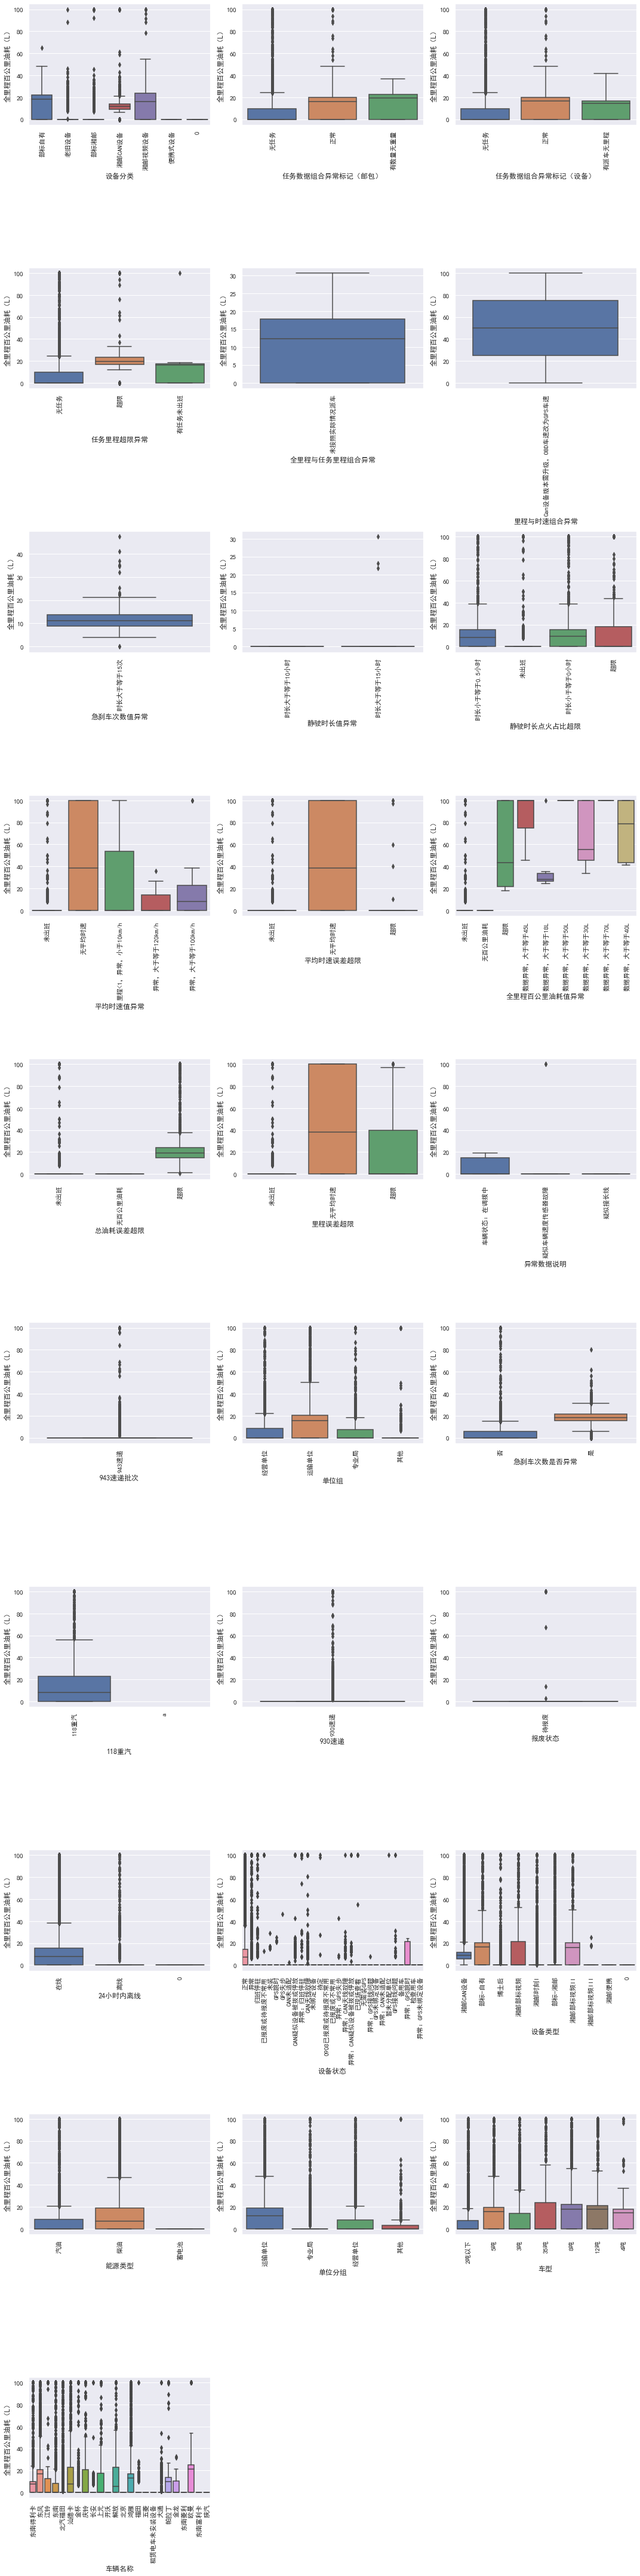

<Figure size 432x288 with 0 Axes>

In [54]:
#从上述样本的统计情况来看,其中 车牌号 特征特征数量众多，不适宜做类别编码。使用单位 特征需要做进一步的考虑，这里我们先对于 剩余的类别特征做统计可视化：
plt.figure()
plt.figure(figsize=(15, 60))
i = 1
for col in ['设备分类', '任务数据组合异常标记（邮包）','任务数据组合异常标记（设备）', '任务里程超限异常',
 '全里程与任务里程组合异常', '里程与时速组合异常','急刹车次数值异常','静驶时长值异常', '静驶时长点火占比超限',
 '平均时速值异常', '平均时速误差超限', '全里程百公里油耗值异常', '总油耗误差超限',
 '里程误差超限','异常数据说明','943速递批次', '单位组','急刹车次数是否异常','118重汽',
 '930速递', '报废状态', '24小时内离线', '设备状态', '设备类型','能源类型', '单位分组', '车型',
 '车辆名称']:
    plt.subplot(10, 3, i)
    i += 1
    fig = sns.boxplot(x=Train_data[col], y=Train_data['全里程百公里油耗（L）'])
    for item in fig.get_xticklabels():
        item.set_rotation(90)

plt.tight_layout()
plt.show()
plt.savefig('./类别特征做统计可视化1.jpg')

<Figure size 432x288 with 0 Axes>

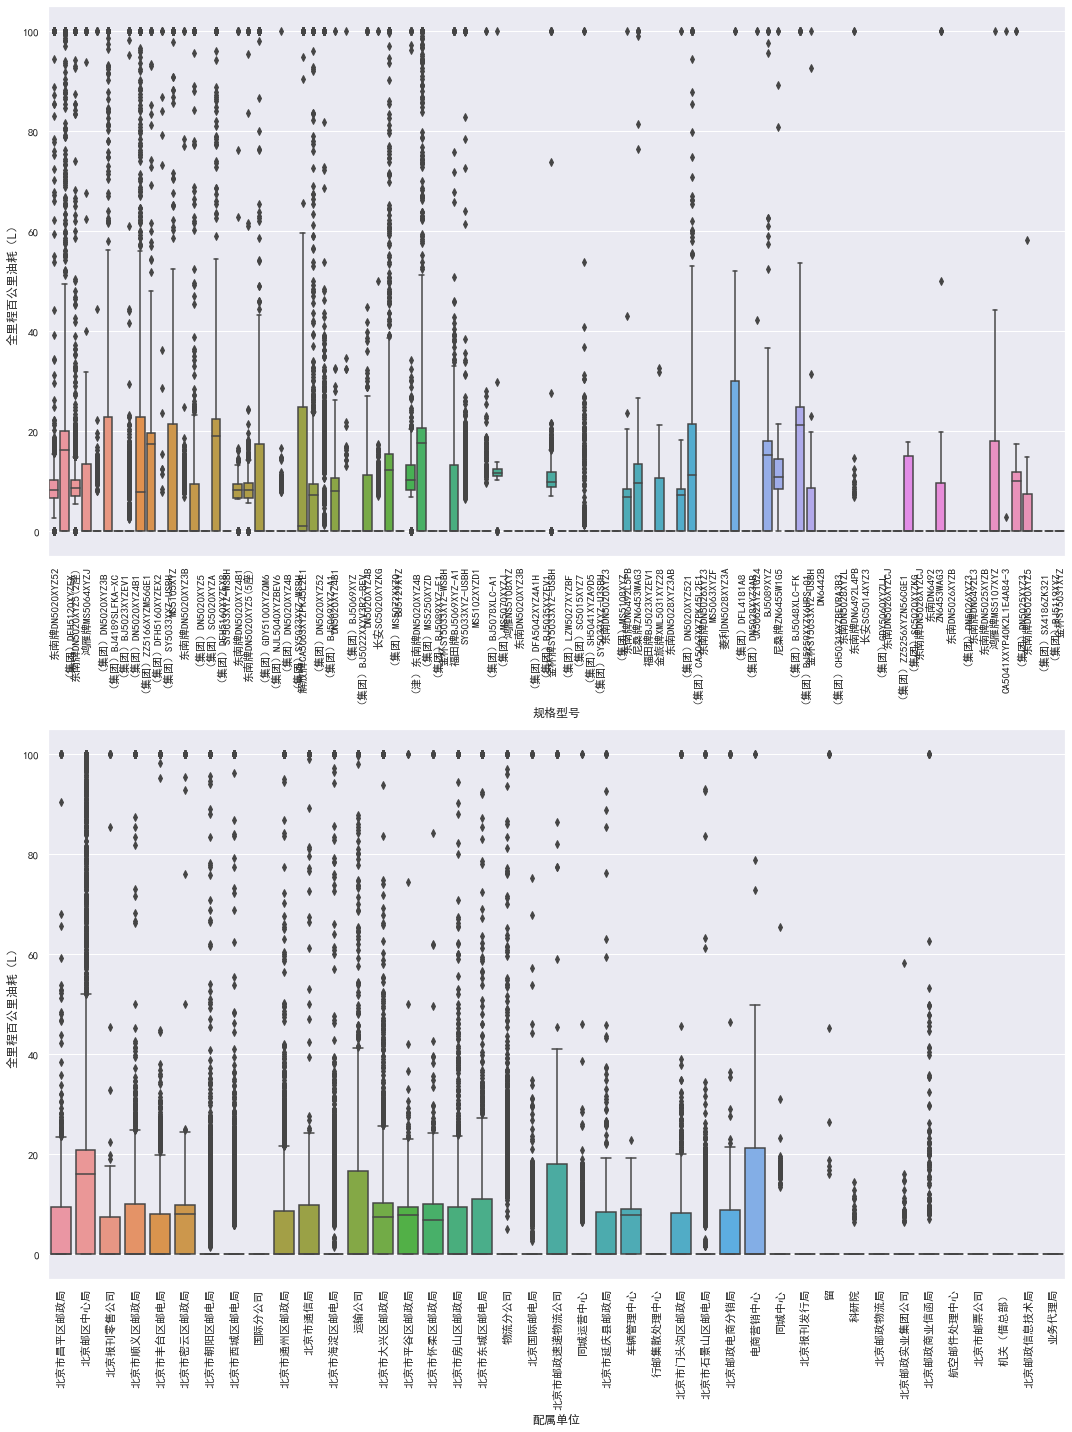

<Figure size 432x288 with 0 Axes>

In [55]:
'''
plt.figure()
plt.figure(figsize=(15, 20))
i = 1
for col in [ '规格型号', '配属单位']:
    plt.subplot(2, 1, i)
    i += 1
    fig = sns.boxplot(x=Train_data[col], y=Train_data['全里程百公里油耗（L）'])
    for item in fig.get_xticklabels():
        item.set_rotation(90)
plt.tight_layout()
plt.show()
plt.savefig('./类别特征做统计可视化2（ 规格型号, 配属单位）.jpg')
'''

<Figure size 432x288 with 0 Axes>

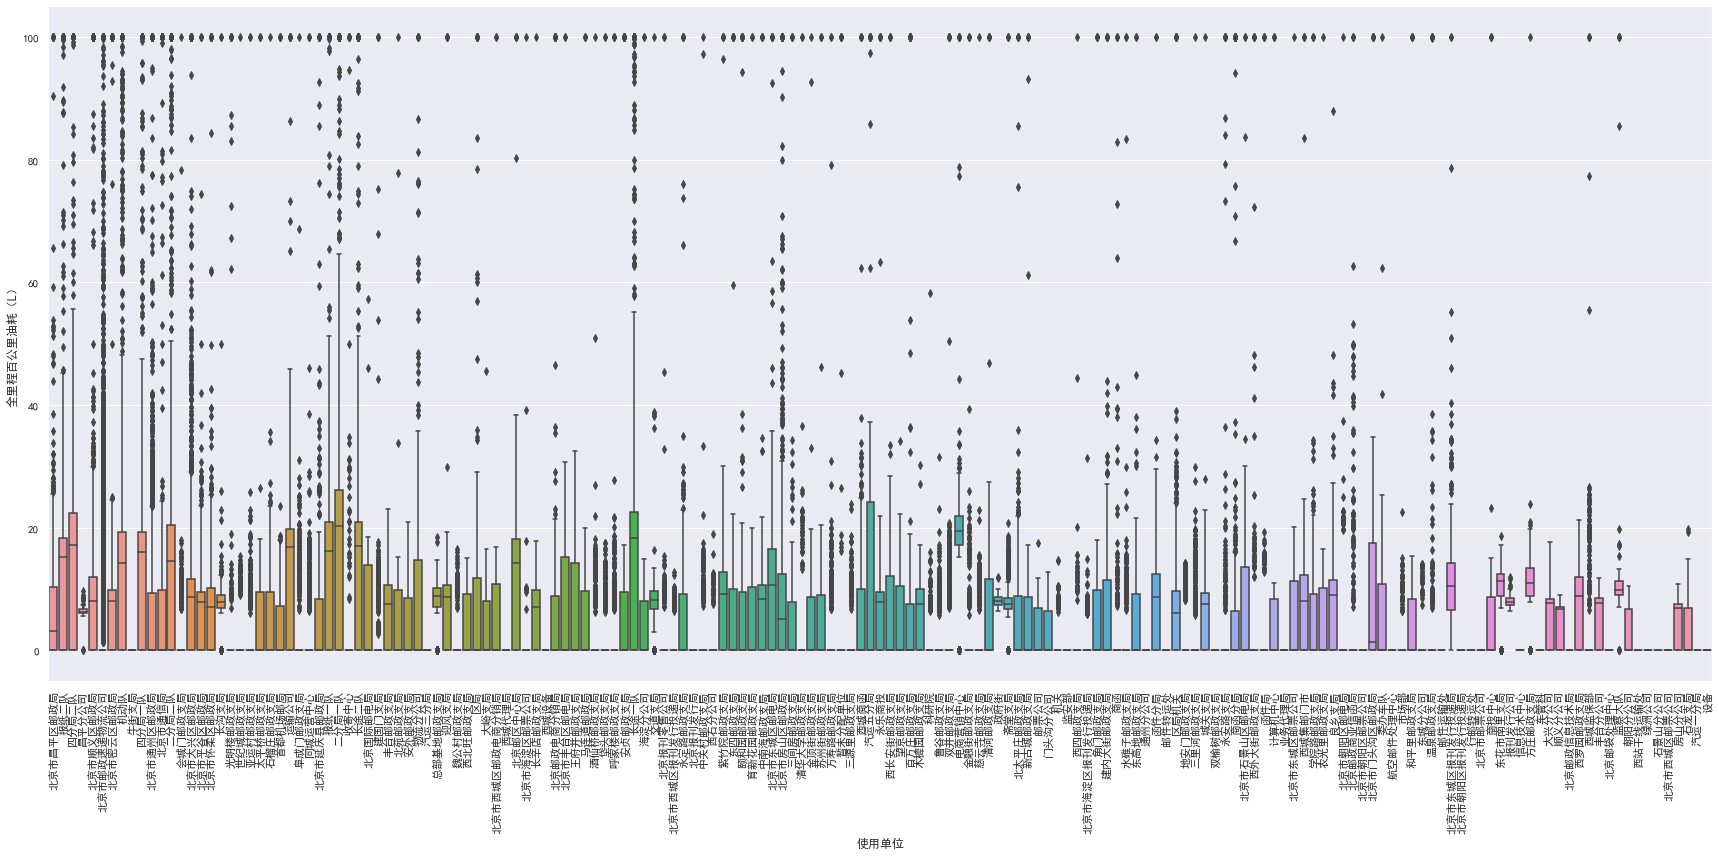

<Figure size 432x288 with 0 Axes>

In [56]:
'''
plt.figure()
plt.figure(figsize=(24, 12))

for col in ['使用单位']:
    plt.subplot(1, 1, 1)
    fig = sns.boxplot(x=Train_data[col], y=Train_data['全里程百公里油耗（L）'])
    for item in fig.get_xticklabels():
        item.set_rotation(90)
plt.tight_layout()
plt.show()
plt.savefig('./类别特征做统计可视化3（使用单位）.jpg')
'''

In [57]:
 '规格型号',
,'使用单位', '配属单位'

('使用单位', "'配属单位'")

In [58]:
len(['设备分类', '任务数据组合异常标记（邮包）','任务数据组合异常标记（设备）', '任务里程超限异常',
 '全里程与任务里程组合异常', '里程与时速组合异常','急刹车次数值异常','静驶时长值异常', '静驶时长点火占比超限',
 '平均时速值异常', '平均时速误差超限', '全里程百公里油耗值异常', '总油耗误差超限',
 '里程误差超限','异常数据说明','943速递批次', '单位组','急刹车次数是否异常','118重汽',
 '930速递', '报废状态', '24小时内离线', '设备状态', '设备类型','能源类型', '单位分组', '车型',
 '规格型号', '车辆名称','使用单位', '配属单位'])

31

In [59]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

def cate_encoder(df,df_test,cols):
    le = LabelEncoder()
    ohe = OneHotEncoder(sparse=False,categories ='auto')
    
    for col in cols:
        print(col+':')
        print(set(df[col]))
        print(set(df_test[col]))
        
        le = le.fit(df[col])
        integer_encoded = le.transform(df[col])
        integer_encoded_test = le.transform(df_test[col])

        # binary encode
        integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
        integer_encoded_test = integer_encoded_test.reshape(len(integer_encoded_test), 1)
        ohe = ohe.fit(integer_encoded)
        
        onehot_encoded = ohe.transform(integer_encoded)
        onehot_encoded_df = pd.DataFrame(onehot_encoded)
        onehot_encoded_df.columns = list(map(lambda x:str(x)+'_'+col,onehot_encoded_df.columns.values))

        onehot_encoded_test = ohe.transform(integer_encoded_test)
        onehot_encoded_test_df = pd.DataFrame(onehot_encoded_test)
        onehot_encoded_test_df.columns = list(map(lambda x:str(x)+'_'+col,onehot_encoded_test_df.columns.values))
        
        df =  pd.concat([df,onehot_encoded_df], axis=1)
        df_test =  pd.concat([df_test,onehot_encoded_test_df], axis=1)
    
    return df,df_test

In [60]:
cate_cols = ['设备分类', '任务数据组合异常标记（邮包）','任务数据组合异常标记（设备）', '任务里程超限异常',
 '全里程与任务里程组合异常', '里程与时速组合异常','急刹车次数值异常','静驶时长值异常', '静驶时长点火占比超限',
 '平均时速值异常', '平均时速误差超限', '全里程百公里油耗值异常', '总油耗误差超限',
 '里程误差超限','异常数据说明','943速递批次', '单位组','急刹车次数是否异常','118重汽',
 '930速递', '报废状态', '24小时内离线', '设备状态', '设备类型','能源类型', '单位分组', '车型',
 '车辆名称','配属单位', '规格型号']
Train_data[cate_cols] = Train_data[cate_cols].fillna(-1)
Test_data[cate_cols] = Test_data[cate_cols].fillna(-1)


In [61]:
#Train_data.to_pickle('Train_data_OH_Bef.pkl')

In [62]:
#Test_data.to_pickle('Test_data_OH_Bef.pkl')

In [63]:
Train_data = pd.read_pickle('Train_data_OH_Bef.pkl') 

In [64]:
Test_data = pd.read_pickle('Test_data_OH_Bef.pkl') 

In [65]:
## 对类别特征进行 OneEncoder
# data = pd.get_dummies(data, columns=cate_cols)

#Train_data,Test_data = cate_encoder(Train_data,Test_data,cate_cols)

#Train_data = pd.get_dummies(Train_data, columns=cate_cols)
#Test_data = pd.get_dummies(Test_data[cate_cols], columns=cate_cols)

In [66]:
#Train_data[cate_cols] = pd.get_dummies(Train_data, columns=cate_cols)
#Train_data = Train_data.join(pd.get_dummies(Train_data, columns=cate_cols))

In [67]:
#a = Train_data.columns.to_list()
#print(len(a))


In [68]:
cate_cols


['设备分类',
 '任务数据组合异常标记（邮包）',
 '任务数据组合异常标记（设备）',
 '任务里程超限异常',
 '全里程与任务里程组合异常',
 '里程与时速组合异常',
 '急刹车次数值异常',
 '静驶时长值异常',
 '静驶时长点火占比超限',
 '平均时速值异常',
 '平均时速误差超限',
 '全里程百公里油耗值异常',
 '总油耗误差超限',
 '里程误差超限',
 '异常数据说明',
 '943速递批次',
 '单位组',
 '急刹车次数是否异常',
 '118重汽',
 '930速递',
 '报废状态',
 '24小时内离线',
 '设备状态',
 '设备类型',
 '能源类型',
 '单位分组',
 '车型',
 '车辆名称',
 '配属单位',
 '规格型号']

In [69]:
Train_data[cate_cols]

,设备分类,任务数据组合异常标记（邮包）,任务数据组合异常标记（设备）,任务里程超限异常,全里程与任务里程组合异常,里程与时速组合异常,急刹车次数值异常,静驶时长值异常,静驶时长点火占比超限,平均时速值异常,平均时速误差超限,全里程百公里油耗值异常,总油耗误差超限,里程误差超限,异常数据说明,943速递批次,单位组,急刹车次数是否异常,118重汽,930速递,报废状态,24小时内离线,设备状态,设备类型,能源类型,单位分组,车型,车辆名称,配属单位,规格型号
198189,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,专业局,-1,-1,-1,-1,在线,正常,部标-湘邮,柴油,-1,3吨,鸿雁,物流分公司,（集团）MS5072XYZQ
7902,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,930速递,-1,在线,正常,博士后,汽油,经营单位,2吨以下,金杯,北京市西城区邮电局,（集团）SY5033XYZ-USBH
157001,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,在线,正常,部标-自有,柴油,运输单位,5吨,东风,北京邮区中心局,（集团）DFH5120XYZEX
53997,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,在线,正常,部标-自有,柴油,运输单位,5吨,东风,北京邮区中心局,（集团）DFH5120XYZEX
38785,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,在线,正常,部标-自有,柴油,运输单位,5吨,东风,北京邮区中心局,（集团）DFH5120XYZEX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52376,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,930速递,-1,在线,正常,博士后,汽油,经营单位,2吨以下,东南,北京市丰台区邮电局,（集团）DN5020XYZ52
194418,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,经营单位,-1,-1,930速递,-1,在线,正常,博士后,汽油,-1,2吨以下,金杯,北京市西城区邮电局,（集团）SY5033XYZ-USBH
30925,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,离线,异常,湘邮CAN设备,汽油,经营单位,2吨以下,东南得利卡,北京市东城区邮电局,东南牌DN5020XYZ52
99766,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,930速递,-1,在线,正常,部标-湘邮,柴油,运输单位,3吨,北汽福田,运输公司,（集团）BJ5069XYZ-A1


In [70]:
Train_data_dummies = pd.get_dummies(Train_data[cate_cols])
Test_data_dummies = pd.get_dummies(Test_data[cate_cols])

In [71]:
Train_data_dummies.head().shape


(5, 307)

In [72]:
Test_data_dummies.head()

,设备分类_-1,设备分类_湘邮CAN设备,设备分类_湘邮视频设备,设备分类_老旧设备,设备分类_部标湘邮,设备分类_部标自有,任务数据组合异常标记（邮包）_-1,任务数据组合异常标记（邮包）_无任务,任务数据组合异常标记（邮包）_有数量无重量,任务数据组合异常标记（邮包）_正常,任务数据组合异常标记（设备）_-1,任务数据组合异常标记（设备）_无任务,任务数据组合异常标记（设备）_有派车无里程,任务数据组合异常标记（设备）_正常,任务里程超限异常_-1,任务里程超限异常_无任务,任务里程超限异常_有任务未出班,任务里程超限异常_超限,全里程与任务里程组合异常_-1,全里程与任务里程组合异常_未按照实际情况派车,里程与时速组合异常_-1,里程与时速组合异常_Can设备版本需升级，OBD车速改为GPS车速,急刹车次数值异常_-1,急刹车次数值异常_时长大于等于15次,静驶时长值异常_-1,静驶时长值异常_时长大于等于10小时,静驶时长值异常_时长大于等于15小时,静驶时长点火占比超限_-1,静驶时长点火占比超限_时长小于等于0.5小时,静驶时长点火占比超限_时长小于等于0小时,静驶时长点火占比超限_未出班,静驶时长点火占比超限_超限,平均时速值异常_-1,平均时速值异常_异常，大于等于100km/h,平均时速值异常_异常，大于等于120km/h,平均时速值异常_无平均时速,平均时速值异常_未出班,平均时速值异常_里程<1，异常，小于10km/h,平均时速误差超限_-1,平均时速误差超限_无平均时速,平均时速误差超限_未出班,平均时速误差超限_超限,全里程百公里油耗值异常_-1,全里程百公里油耗值异常_数据异常，大于等于18L,全里程百公里油耗值异常_数据异常，大于等于30L,全里程百公里油耗值异常_数据异常，大于等于40L,全里程百公里油耗值异常_数据异常，大于等于45L,全里程百公里油耗值异常_数据异常，大于等于50L,全里程百公里油耗值异常_无百公里油耗,全里程百公里油耗值异常_未出班,全里程百公里油耗值异常_超限,总油耗误差超限_-1,总油耗误差超限_无百公里油耗,总油耗误差超限_未出班,总油耗误差超限_超限,里程误差超限_-1,里程误差超限_无平均时速,里程误差超限_未出班,里程误差超限_超限,异常数据说明_-1,异常数据说明_疑似接长线,异常数据说明_疑似车辆速度传感器故障,异常数据说明_车辆状态：在调拨中,943速递批次_-1,943速递批次_943速递,单位组_-1,单位组_专业局,单位组_其他,单位组_经营单位,单位组_运输单位,急刹车次数是否异常_-1,急刹车次数是否异常_否,急刹车次数是否异常_是,118重汽_-1,118重汽_ a,118重汽_118重汽,930速递_-1,930速递_930速递,报废状态_-1,报废状态_待报废,24小时内离线_-1,24小时内离线_0,24小时内离线_在线,24小时内离线_离线,设备状态_-1,设备状态_0908已报废或待报废不常用,设备状态_CAN天线故障,设备状态_CAN未适配,设备状态_CAN疑似设备被拔或停放,设备状态_GPS失步,设备状态_GPS接线问题,设备状态_GPS未绑定设备,设备状态_GPS跳时,设备状态_备用车,设备状态_已报废或不常用,设备状态_已报废或待报废不常用,设备状态_已现场查看,设备状态_异常,设备状态_异常：CAN天线故障,设备状态_异常：CAN未适配,设备状态_异常：CAN疑似设备被拔或停放,设备状态_异常：GPS失步,设备状态_异常：GPS接线问题,设备状态_异常：GPS未绑定设备,设备状态_异常：GPS跳时,设备状态_异常：归班停驻,设备状态_归班停驻,设备状态_待定,设备状态_无需装GPS,设备状态_暂未分配单位,设备状态_未绑定设备,设备状态_未装,设备状态_检查用车,设备状态_正常,设备类型_-1,设备类型_0,设备类型_博士后,设备类型_湘邮CAN设备,设备类型_湘邮便携,设备类型_湘邮时刻I,设备类型_湘邮部标视频,设备类型_湘邮部标视频II,设备类型_湘邮部标视频III,设备类型_部标-湘邮,设备类型_部标-自有,能源类型_-1,能源类型_柴油,能源类型_汽油,能源类型_蓄电池,单位分组_-1,单位分组_专业局,单位分组_其他,单位分组_经营单位,单位分组_运输单位,车型_-1,车型_12吨,车型_2吨以下,车型_35吨,车型_3吨,车型_4吨,车型_5吨,车型_8吨,车辆名称_-1,车辆名称_上元,车辆名称_东南,车辆名称_东南富利卡,车辆名称_东南得利卡,车辆名称_东南菱利,车辆名称_东风,车辆名称_五菱,车辆名称_北京,车辆名称_北汽福田,车辆名称_大通,车辆名称_帕拉丁,车辆名称_庆铃,车辆名称_开沃,车辆名称_欧曼,车辆名称_汕德卡,车辆名称_江铃,车辆名称_福田,车辆名称_租赁电车未安装设备,车辆名称_解放,车辆名称_金杯,车辆名称_金龙,车辆名称_长安,车辆名称_陕汽,车辆名称_鸿雁,配属单位_-1,配属单位_业务代理局,配属单位_北京国际邮电局,配属单位_北京市东城区邮电局,配属单位_北京市丰台区邮电局,配属单位_北京市大兴区邮政局,配属单位_北京市密云区邮政局,配属单位_北京市平谷区邮政局,配属单位_北京市延庆县邮政局,配属单位_北京市怀柔区邮政局,配属单位_北京市房山区邮政局,配属单位_北京市昌平区邮政局,配属单位_北京市朝阳区邮电局,配属单位_北京市海淀区邮电局,配属单位_北京市石景山区邮电局,配属单位_北京市西城区邮电局,配属单位_北京市通信局,配属单位_北京市通州区邮政局,配属单位_北京市邮政速递物流公司,配属单位_北京市邮票公司,配属单位_北京市门头沟区邮政局,配属单位_北京市顺义区邮政局,配属单位_北京报刊发行局,配属单位_北京报刊零售公司,配属单位_北京邮区中心局,配属单位_北京邮政信息技术局,配属单位_北京邮政商业信函局,配属单位_北京邮政实业集团公司,配属单位_北京邮政物流局,配属单位_北京邮政电商分销局,配属单位_同城中心,配属单位_同城运营中心,配属单位_国际分公司,配属单位_机关（借总部）,配属单位_物流分公司,配属单位_电商营销中心,配属单位_留,配属单位_科研院,配属单位_航空邮件处理中心,配属单位_行邮集散处理中心,配属单位_车辆管理中心,配属单位_运输公司,规格型号_-1,规格型号_BJ5089XYZ,规格型号_BJ5129XYZ,规格型号_CA5041XXYP40K2L1E4A84-3,规格型号_DN5020XYZ4B,规格型号_DN5020XYZ4B1,规格型号_DN6442B,规格型号_JX5062XYZTG24,规格型号_MS5063XYZF,规格型号_MS5102XYZD1,规格型号_MS5105XYZ,规格型号_SY5033XYZ-USBH,规格型号_SY5033XYZ-WSBH,规格型号_ZN6453WAG3,规格型号_东南DN5020XYZ3,规格型号_东南DN5020XYZ3B,规格型号_东南DN5026XYZB,规格型号_东南DN5026XYZCJ,规格型号_东南DN5028XYZ3AB,规格型号_东南DN5028XYZL,规格型号_东南DN6492,规格型号_东南牌DN5020XYZ3B,规格型号_东南牌DN5020XYZ4B1,规格型号_东南牌DN5020XYZ5,规格型号_东南牌DN5020XYZ5(2座),规格型号_东南牌DN5020XYZ5(5座),规格型号_东南牌DN5020XYZ52,规格型号_东南牌DN5025XYZB,规格型号_东南牌DN5026XYZ3,规格型号_东南牌DN5026XYZCJ,规格型号_东南牌DN6492L3,规格型号_东南牌DN6492L4PB,规格型号_东南牌DN6492L5PB,规格型号_尼桑牌ZN6453WAG3,规格型号_尼桑牌ZN6455W1G5,规格型号_福田牌BJ5023XYZEV1,规格型号_福田牌BJ5069XYZ-A1,规格型号_菱利DN5028XYZ3A,规格型号_解放牌CA5063XYZPK45L2E1,规格型号_金旅牌XML5031XYZ28,规格型号_金杯SY5031XYZ,规格型号_金杯SY5033XYZ-USBH,规格型号_金杯SY5033XYZ-WSBH,规格型号_金杯牌SY5033XYZ-USBH,规格型号_长安SC5014XYZ3,规格型号_长安SC5020XYZKG,规格型号_鸿雁NS5108XYZ,规格型号_鸿雁牌MS5064XYZJ,规格型号_鸿雁牌MS5107XYZ,规格型号_（津）东南牌DN5020XYZ4B,规格型号_（集团）BJ4189SLFKA-XC,规格型号_（集团）BJ5022XXYV3R2-BEV,规格型号_（集团）BJ5023XYZEV1,规格型号_（集团）BJ5035XYZEV1,规格型号_（集团）BJ5048XLC-FK,规格型号_（集团）BJ5069XYZ,规格型号_（集团）BJ5069XYZ-A1,规格型号_（集团）BJ5078XLC-A1,规格型号_（集团）BJ5089XYZ-F1,规格型号_（集团）BJ5119XYZ,规格型号_（集团）BJ5259XYZY6HPS-01,规格型号_（集团）CA5063XYZPK45L2E1,规格型号_（集团）CH5031XYZBEVRA3B3,规格型号_（集团）DFA5042XYZ4A1H,规格型号_（集团）DFH5120XYZEX,规格型号_（集团）DFH5160XYZEX2,规格型号_（集团）DFH5160XYZEX8,规格型

In [73]:
#Train_data_coded这里处理完时间特征和类别特征，使用一个中间变量Train_data_coded存储，防止后面失误
Train_data_coded = Train_data.drop(cate_cols,axis = 1)
Train_data_coded = pd.concat([Train_data_coded,Train_data_dummies ],axis=1)
Test_data_coded = Test_data.drop(cate_cols,axis = 1)
Test_data_coded = pd.concat([Test_data_coded,Test_data_dummies ],axis=1)

In [74]:
Test_data_coded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68604 entries, 193466 to 170861
Columns: 385 entries, 车牌号 to 规格型号_（集团）ZZ5256XYZN56CGE1
dtypes: datetime64[ns](2), float64(62), int64(4), object(13), uint8(304)
memory usage: 62.8+ MB


In [75]:
Test_data_coded.select_dtypes(include = 'object').columns
#Train_data_coded这里处理完时间特征和类别特征（ '车牌号', '使用单位'特征数量太多编码无效 ），数值特征还未处理

Index(['车牌号', '使用单位', '里程利用率', '时长利用率', '未锁星占比', '间隔大占比', '静驶率', '任务里程利用率',
       '任务承载率', '全天里程误差率', '全天总油耗误差率', '平均时速误差率', '任务里程误差率'],
      dtype='object')

In [76]:
math_v_col = ['里程利用率', '时长利用率', '未锁星占比', '间隔大占比', '静驶率', '任务里程利用率',
       '任务承载率', '全天里程误差率', '全天总油耗误差率', '平均时速误差率', '任务里程误差率']
#Train_data_coded[math_v_col].info()
sta_cate(Train_data_coded,math_v_col )

,column,nunique,miss_rate,most_value,most_value_counts,max_value_counts_rate
0,里程利用率,74057,0.393089,0,1629,0.007915
1,时长利用率,4690,0.396820,0,1638,0.007959
2,未锁星占比,11899,0.000316,0,53164,0.258315
3,间隔大占比,2756,0.000316,0,88434,0.429685
4,静驶率,5469,0.796775,0,22415,0.108911
5,任务里程利用率,3261,0.796775,0.00%,25189,0.122389
6,任务承载率,3152,0.796775,0.00%,25304,0.122948
7,全天里程误差率,1140,0.864463,0.00%,616,0.002993
8,全天总油耗误差率,4794,0.918396,3.26%,35,0.000170
9,平均时速误差率,1080,0.864448,0.00%,639,0.003105


In [77]:
Train_data_coded[math_v_col].head(10)

,里程利用率,时长利用率,未锁星占比,间隔大占比,静驶率,任务里程利用率,任务承载率,全天里程误差率,全天总油耗误差率,平均时速误差率,任务里程误差率
198189,1.5086,0.8275,0.1815,0.0029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7902,0.499168,0.2475,0.00%,3.42%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
157001,0.705334,0.3,0,0.0014,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53997,0.690002,0.62875,0.00%,0.00%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38785,1.43293,0.43125,33.23%,0.00%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
247033,NaN,NaN,0,0,0,0.00%,0.00%,NaN,NaN,NaN,NaN
185071,26.65%,23.50%,0,0.0796,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9050,0.573318,0.59375,36.88%,0.00%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
134271,0.412907,0.415,0,0.1776,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79626,0.71663,0.39375,11.61%,0.00%,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
#处理数值特征中的%和type
def math_v_proc(df,cols):
    for col in cols:
        print(col)
#        df[col] = pd.DataFrame(df[col])
        for index, row in df[col].iteritems():
            if '%' in str(row):
#                print(row)
                row = row.strip('%')
                df.loc[index, col] = float(row)/100 
  
            
#                print(df.loc[index, col])
            else:
#                df.loc[index, col] = row.astype('float')
#                 print(type(row))
                if type(row)==object:
                    print('/n/n不是/n/n')
        
        
        

                

In [79]:
#训练集数值特征变量处理，去除%号和浮点数化，不能是object类型
Train_Total_coded = Train_data_coded[math_v_col]
math_v_proc(Train_Total_coded,math_v_col)
for col in math_v_col:
     Train_Total_coded[col] = pd.to_numeric(Train_Total_coded[col], errors='coerce')
     Train_Total_coded[col] = Train_Total_coded[col].replace([np.inf,-np.inf],0)
Train_Total_coded_half = Train_data_coded.drop(['车牌号', '使用单位', '里程利用率', '时长利用率', '未锁星占比', '间隔大占比', '静驶率', '任务里程利用率',
       '任务承载率', '全天里程误差率', '全天总油耗误差率', '平均时速误差率', '任务里程误差率'],axis = 1)
Train_Total_coded = pd.concat([Train_Total_coded_half,Train_Total_coded ],axis=1)
Train_Total_coded.describe()

里程利用率
时长利用率
未锁星占比
间隔大占比
静驶率
任务里程利用率
任务承载率
全天里程误差率
全天总油耗误差率
平均时速误差率
任务里程误差率


,吨位,当日有派车次数,全天行驶里程km,其中任务行驶里程km,全天运行时长（点火时长）hh,其中任务行驶时长hh,全天静驶时长,平均时速km/h,最大扭距,平均扭距,急刹车次数,超速报警次数,前3日平均运行里程km,前3日日平均运行时长h,近4日平均运行里程km,近4日日平均运行时长h,怠速次数,怠速时长mm,任务百公里油耗（L）,全里程百公里油耗（L）,高档低速次数,高档低速累计时长mm,低档高速次数,低档高速累计时长mm,空档滑行次数,空档滑行时长mm,Can设备状态,油耗量（当天）,市趟次数,一干次数,二干次数,里程标杆值km,时长标杆值h,实际里程参考值km,位置总数,未锁星数,延迟位置数,行驶位置数,间隔大位置数,ACC关位置数,行驶时长,拉直线次数,拉直线总距离,设备序列号,在线时长,里程误差,311/388/29/72批次,294无里程关注,每百公里急刹车次数,任务标准里程(km),任务GPS里程(km),任务总包数量,任务总包重量(吨),全天总油耗验证(L),平均时速验证(km/h),数据异常项数,任务数量,派车次数误差,登记日期_year,登记日期_month,登记日期_day,登记日期_dayofweek,date_parsed_year,date_parsed_month,date_parsed_day,date_parsed_dayofweek,设备分类_-1,设备分类_0,设备分类_便携式设备,设备分类_湘邮CAN设备,设备分类_湘邮视频设备,设备分类_老旧设备,设备分类_部标湘邮,设备分类_部标自有,任务数据组合异常标记（邮包）_-1,任务数据组合异常标记（邮包）_无任务,任务数据组合异常标记（邮包）_有数量无重量,任务数据组合异常标记（邮包）_正常,任务数据组合异常标记（设备）_-1,任务数据组合异常标记（设备）_无任务,任务数据组合异常标记（设备）_有派车无里程,任务数据组合异常标记（设备）_正常,任务里程超限异常_-1,任务里程超限异常_无任务,任务里程超限异常_有任务未出班,任务里程超限异常_超限,全里程与任务里程组合异常_-1,全里程与任务里程组合异常_未按照实际情况派车,里程与时速组合异常_-1,里程与时速组合异常_Can设备版本需升级，OBD车速改为GPS车速,里程与时速组合异常_疑似GPS设备跳时导致，需现场检修,急刹车次数值异常_-1,急刹车次数值异常_时长大于等于15次,静驶时长值异常_-1,静驶时长值异常_时长大于等于10小时,静驶时长值异常_时长大于等于15小时,静驶时长点火占比超限_-1,静驶时长点火占比超限_时长小于等于0.5小时,静驶时长点火占比超限_时长小于等于0小时,静驶时长点火占比超限_未出班,静驶时长点火占比超限_超限,平均时速值异常_-1,平均时速值异常_异常，大于等于100km/h,平均时速值异常_异常，大于等于120km/h,平均时速值异常_无平均时速,平均时速值异常_未出班,平均时速值异常_里程<1，异常，小于10km/h,平均时速误差超限_-1,平均时速误差超限_无平均时速,平均时速误差超限_未出班,平均时速误差超限_超限,全里程百公里油耗值异常_-1,全里程百公里油耗值异常_数据异常，大于等于18L,全里程百公里油耗值异常_数据异常，大于等于30L,全里程百公里油耗值异常_数据异常，大于等于40L,全里程百公里油耗值异常_数据异常，大于等于45L,全里程百公里油耗值异常_数据异常，大于等于50L,全里程百公里油耗值异常_数据异常，大于等于70L,全里程百公里油耗值异常_无百公里油耗,全里程百公里油耗值异常_未出班,全里程百公里油耗值异常_超限,总油耗误差超限_-1,总油耗误差超限_无百公里油耗,总油耗误差超限_未出班,总油耗误差超限_超限,里程误差超限_-1,里程误差超限_无平均时速,里程误差超限_未出班,里程误差超限_超限,异常数据说明_-1,异常数据说明_疑似接长线,异常数据说明_疑似车辆速度传感器故障,异常数据说明_车辆状态：在调拨中,943速递批次_-1,943速递批次_943速递,单位组_-1,单位组_专业局,单位组_其他,单位组_经营单位,单位组_运输单位,急刹车次数是否异常_-1,急刹车次数是否异常_否,急刹车次数是否异常_是,118重汽_-1,118重汽_118重汽,930速递_-1,930速递_930速递,报废状态_-1,报废状态_待报废,24小时内离线_-1,24小时内离线_0,24小时内离线_在线,24小时内离线_离线,设备状态_-1,设备状态_0908已报废或待报废不常用,设备状态_CAN天线故障,设备状态_CAN未适配,设备状态_CAN疑似设备被拔或停放,设备状态_GPS失步,设备状态_GPS接线问题,设备状态_GPS未绑定设备,设备状态_GPS跳时,设备状态_备用车,设备状态_已报废或不常用,设备状态_已报废或待报废不常用,设备状态_已现场查看,设备状态_异常,设备状态_异常：CAN天线故障,设备状态_异常：CAN未适配,设备状态_异常：CAN疑似设备被拔或停放,设备状态_异常：GPS失步,设备状态_异常：GPS接线问题,设备状态_异常：GPS未绑定设备,设备状态_异常：GPS跳时,设备状态_异常：归班停驻,设备状态_归班停驻,设备状态_待定,设备状态_无需装GPS,设备状态_暂未分配单位,设备状态_未绑定设备,设备状态_未装,设备状态_检查用车,设备状态_正常,设备类型_-1,设备类型_0,设备类型_博士后,设备类型_湘邮CAN设备,设备类型_湘邮便携,设备类型_湘邮时刻I,设备类型_湘邮部标视频,设备类型_湘邮部标视频II,设备类型_湘邮部标视频III,设备类型_部标-湘邮,设备类型_部标-自有,能源类型_-1,能源类型_柴油,能源类型_汽油,能源类型_蓄电池,单位分组_-1,单位分组_专业局,单位分组_其他,单位分组_经营单位,单位分组_运输单位,车型_-1,车型_12吨,车型_2吨以下,车型_35吨,车型_3吨,车型_4吨,车型_5吨,车型_8吨,车辆名称_-1,车辆名称_上元,车辆名称_东南,车辆名称_东南富利卡,车辆名称_东南得利卡,车辆名称_东南菱利,车辆名称_东风,车辆名称_五菱,车辆名称_北京,车辆名称_北汽福田,车辆名称_大通,车辆名称_帕拉丁,车辆名称_庆铃,车辆名称_开沃,车辆名称_欧曼,车辆名称_汕德卡,车辆名称_江铃,车辆名称_福田,车辆名称_租赁电车未安装设备,车辆名称_解放,车辆名称_金杯,车辆名称_金龙,车辆名称_长安,车辆名称_陕汽,车辆名称_鸿雁,配属单位_-1,配属单位_业务代理局,配属单位_北京国际邮电局,配属单位_北京市东城区邮电局,配属单位_北京市丰台区邮电局,配属单位_北京市大兴区邮政局,配属单位_北京市密云区邮政局,配属单位_北京市平谷区邮政局,配属单位_北京市延庆县邮政局,配属单位_北京市怀柔区邮政局,配属单位_北京市房山区邮政局,配属单位_北京市昌平区邮政局,配属单位_北京市朝阳区邮电局,配属单位_北京市海淀区邮电局,配属单位_北京市石景山区邮电局,配属单位_北京市西城区邮电局,配属单位_北京市通信局,配属单位_北京市通州区邮政局,配属单位_北京市邮政速递物流公司,配属单位_北京市邮票公司,配属单位_北京市门头沟区邮政局,配属单位_北京市顺义区邮政局,配属单位_北京报刊发行局,配属单位_北京报刊零售公司,配属单位_北京邮区中心局,配属单位_北京邮政信息技术局,配属单位_北京邮政商业信函局,配属单位_北京邮政实业集团公司,配属单位_北京邮政物流局,配属单位_北京邮政电商分销局,配属单位_同城中心,配属单位_同城运营中心,配属单位_国际分公司,配属单位_机关（借总部）,配属单位_物流分公司,配属单位_电商营销中心,配属单位_留,配属单位_科研院,配属单位_航空邮件处理中心,配属单位_行邮集散处理中心,配属单位_车辆管理中心,配属单位_运输公司,规格型号_-1,规格型号_BJ5089XYZ,规格型号_BJ5129XYZ,规格型号_CA5041XXYP40K2L1E4A84-3,规格型号_DN5020XYZ4B,规格型号_DN5020XYZ4B1,规格型号_DN6442B,规格型号_JX5062XYZTG24,规格型号_MS5063XYZF,规格型号_MS5102XYZD1,规格型号_MS5105XYZ,规格型号_SY5033XYZ-USBH,规格型号_SY5033XYZ-WSBH,规格型号_ZN6453WAG3,规格型号_东南DN5020XYZ3,规格型号_东南DN5020XYZ3B,规格型号_东南DN5026XYZB,规格型号_东南DN5026XYZCJ,规格型号_东南DN5028XYZ3AB,规格型号_东南DN5028XYZL,规格型号_东南DN6492,规格型号_东南牌DN5020XYZ3B,规格型号_东南牌DN5020XYZ4B1,规格型号_东南牌DN5020XYZ5,规格型号_东南牌DN5020XYZ5(2座),规格型号_东南牌DN5020XYZ5(5座),规格型号_东南牌DN5020XYZ52,规格型号_东南牌DN5025XYZB,规格型号_东南牌DN5026XYZ3,规格型号_东南牌DN5026XYZCJ,规格型号_东南牌DN6492L3,规格型号_东南牌DN6492L4PB,规格型号_东南牌DN6492L5PB,规格型号_尼桑牌ZN6453WAG3,规格型号_尼桑牌ZN6455W1G5,规格型号_福田牌BJ5023XYZEV1,规格型号_福田牌BJ5069XYZ-A1,规格型号_

In [80]:
#测试集数值特征变量处理，去除%号和浮点数化，不能是object类型
Test_Total_coded = Test_data_coded
math_v_proc(Test_Total_coded,math_v_col)
for col in math_v_col:
     Test_Total_coded[col] = pd.to_numeric(Test_Total_coded[col], errors='coerce')
     Test_Total_coded[col] = Test_Total_coded[col].replace([np.inf,-np.inf],0)
Test_Total_coded.describe()


里程利用率
时长利用率
未锁星占比
间隔大占比
静驶率
任务里程利用率
任务承载率
全天里程误差率
全天总油耗误差率
平均时速误差率
任务里程误差率


,吨位,当日有派车次数,全天行驶里程km,其中任务行驶里程km,全天运行时长（点火时长）hh,其中任务行驶时长hh,全天静驶时长,平均时速km/h,最大扭距,平均扭距,急刹车次数,超速报警次数,前3日平均运行里程km,前3日日平均运行时长h,近4日平均运行里程km,近4日日平均运行时长h,怠速次数,怠速时长mm,任务百公里油耗（L）,全里程百公里油耗（L）,高档低速次数,高档低速累计时长mm,低档高速次数,低档高速累计时长mm,空档滑行次数,空档滑行时长mm,Can设备状态,油耗量（当天）,市趟次数,一干次数,二干次数,里程标杆值km,里程利用率,时长标杆值h,时长利用率,实际里程参考值km,位置总数,未锁星数,未锁星占比,延迟位置数,行驶位置数,间隔大位置数,ACC关位置数,间隔大占比,行驶时长,拉直线次数,拉直线总距离,设备序列号,在线时长,里程误差,311/388/29/72批次,294无里程关注,每百公里急刹车次数,静驶率,任务标准里程(km),任务GPS里程(km),任务总包数量,任务总包重量(吨),任务里程利用率,任务承载率,全天里程误差率,全天总油耗验证(L),全天总油耗误差率,平均时速验证(km/h),平均时速误差率,数据异常项数,任务里程误差率,任务数量,派车次数误差,登记日期_year,登记日期_month,登记日期_day,登记日期_dayofweek,date_parsed_year,date_parsed_month,date_parsed_day,date_parsed_dayofweek,设备分类_-1,设备分类_湘邮CAN设备,设备分类_湘邮视频设备,设备分类_老旧设备,设备分类_部标湘邮,设备分类_部标自有,任务数据组合异常标记（邮包）_-1,任务数据组合异常标记（邮包）_无任务,任务数据组合异常标记（邮包）_有数量无重量,任务数据组合异常标记（邮包）_正常,任务数据组合异常标记（设备）_-1,任务数据组合异常标记（设备）_无任务,任务数据组合异常标记（设备）_有派车无里程,任务数据组合异常标记（设备）_正常,任务里程超限异常_-1,任务里程超限异常_无任务,任务里程超限异常_有任务未出班,任务里程超限异常_超限,全里程与任务里程组合异常_-1,全里程与任务里程组合异常_未按照实际情况派车,里程与时速组合异常_-1,里程与时速组合异常_Can设备版本需升级，OBD车速改为GPS车速,急刹车次数值异常_-1,急刹车次数值异常_时长大于等于15次,静驶时长值异常_-1,静驶时长值异常_时长大于等于10小时,静驶时长值异常_时长大于等于15小时,静驶时长点火占比超限_-1,静驶时长点火占比超限_时长小于等于0.5小时,静驶时长点火占比超限_时长小于等于0小时,静驶时长点火占比超限_未出班,静驶时长点火占比超限_超限,平均时速值异常_-1,平均时速值异常_异常，大于等于100km/h,平均时速值异常_异常，大于等于120km/h,平均时速值异常_无平均时速,平均时速值异常_未出班,平均时速值异常_里程<1，异常，小于10km/h,平均时速误差超限_-1,平均时速误差超限_无平均时速,平均时速误差超限_未出班,平均时速误差超限_超限,全里程百公里油耗值异常_-1,全里程百公里油耗值异常_数据异常，大于等于18L,全里程百公里油耗值异常_数据异常，大于等于30L,全里程百公里油耗值异常_数据异常，大于等于40L,全里程百公里油耗值异常_数据异常，大于等于45L,全里程百公里油耗值异常_数据异常，大于等于50L,全里程百公里油耗值异常_无百公里油耗,全里程百公里油耗值异常_未出班,全里程百公里油耗值异常_超限,总油耗误差超限_-1,总油耗误差超限_无百公里油耗,总油耗误差超限_未出班,总油耗误差超限_超限,里程误差超限_-1,里程误差超限_无平均时速,里程误差超限_未出班,里程误差超限_超限,异常数据说明_-1,异常数据说明_疑似接长线,异常数据说明_疑似车辆速度传感器故障,异常数据说明_车辆状态：在调拨中,943速递批次_-1,943速递批次_943速递,单位组_-1,单位组_专业局,单位组_其他,单位组_经营单位,单位组_运输单位,急刹车次数是否异常_-1,急刹车次数是否异常_否,急刹车次数是否异常_是,118重汽_-1,118重汽_ a,118重汽_118重汽,930速递_-1,930速递_930速递,报废状态_-1,报废状态_待报废,24小时内离线_-1,24小时内离线_0,24小时内离线_在线,24小时内离线_离线,设备状态_-1,设备状态_0908已报废或待报废不常用,设备状态_CAN天线故障,设备状态_CAN未适配,设备状态_CAN疑似设备被拔或停放,设备状态_GPS失步,设备状态_GPS接线问题,设备状态_GPS未绑定设备,设备状态_GPS跳时,设备状态_备用车,设备状态_已报废或不常用,设备状态_已报废或待报废不常用,设备状态_已现场查看,设备状态_异常,设备状态_异常：CAN天线故障,设备状态_异常：CAN未适配,设备状态_异常：CAN疑似设备被拔或停放,设备状态_异常：GPS失步,设备状态_异常：GPS接线问题,设备状态_异常：GPS未绑定设备,设备状态_异常：GPS跳时,设备状态_异常：归班停驻,设备状态_归班停驻,设备状态_待定,设备状态_无需装GPS,设备状态_暂未分配单位,设备状态_未绑定设备,设备状态_未装,设备状态_检查用车,设备状态_正常,设备类型_-1,设备类型_0,设备类型_博士后,设备类型_湘邮CAN设备,设备类型_湘邮便携,设备类型_湘邮时刻I,设备类型_湘邮部标视频,设备类型_湘邮部标视频II,设备类型_湘邮部标视频III,设备类型_部标-湘邮,设备类型_部标-自有,能源类型_-1,能源类型_柴油,能源类型_汽油,能源类型_蓄电池,单位分组_-1,单位分组_专业局,单位分组_其他,单位分组_经营单位,单位分组_运输单位,车型_-1,车型_12吨,车型_2吨以下,车型_35吨,车型_3吨,车型_4吨,车型_5吨,车型_8吨,车辆名称_-1,车辆名称_上元,车辆名称_东南,车辆名称_东南富利卡,车辆名称_东南得利卡,车辆名称_东南菱利,车辆名称_东风,车辆名称_五菱,车辆名称_北京,车辆名称_北汽福田,车辆名称_大通,车辆名称_帕拉丁,车辆名称_庆铃,车辆名称_开沃,车辆名称_欧曼,车辆名称_汕德卡,车辆名称_江铃,车辆名称_福田,车辆名称_租赁电车未安装设备,车辆名称_解放,车辆名称_金杯,车辆名称_金龙,车辆名称_长安,车辆名称_陕汽,车辆名称_鸿雁,配属单位_-1,配属单位_业务代理局,配属单位_北京国际邮电局,配属单位_北京市东城区邮电局,配属单位_北京市丰台区邮电局,配属单位_北京市大兴区邮政局,配属单位_北京市密云区邮政局,配属单位_北京市平谷区邮政局,配属单位_北京市延庆县邮政局,配属单位_北京市怀柔区邮政局,配属单位_北京市房山区邮政局,配属单位_北京市昌平区邮政局,配属单位_北京市朝阳区邮电局,配属单位_北京市海淀区邮电局,配属单位_北京市石景山区邮电局,配属单位_北京市西城区邮电局,配属单位_北京市通信局,配属单位_北京市通州区邮政局,配属单位_北京市邮政速递物流公司,配属单位_北京市邮票公司,配属单位_北京市门头沟区邮政局,配属单位_北京市顺义区邮政局,配属单位_北京报刊发行局,配属单位_北京报刊零售公司,配属单位_北京邮区中心局,配属单位_北京邮政信息技术局,配属单位_北京邮政商业信函局,配属单位_北京邮政实业集团公司,配属单位_北京邮政物流局,配属单位_北京邮政电商分销局,配属单位_同城中心,配属单位_同城运营中心,配属单位_国际分公司,配属单位_机关（借总部）,配属单位_物流分公司,配属单位_电商营销中心,配属单位_留,配属单位_科研院,配属单位_航空邮件处理中心,配属单位_行邮集散处理中心,配属单位_车辆管理中心,配属单位_运输公司,规格型号_-1,规格型号_BJ5089XYZ,规格型号_BJ5129XYZ,规格型号_CA5041XXYP40K2L1E4A84-3,规格型号_DN5020XYZ4B,规格型号_DN5020XYZ4B1,规格型号_DN6442B,规格型号_JX5062XYZTG24,规格型号_MS5063XYZF,规格型号_MS5102XYZD1,规格型号_MS5105XYZ,规格型号_SY5033XYZ-USBH,规格型号_SY5033XYZ-WSBH,规格型号_ZN6453WAG3,规格型号_东南DN5020XYZ3,规格型号_东南DN5020XYZ3B,规格型号_东南DN5026XYZB,规格型号_东南DN5026XYZCJ,规格型号_东南DN5028XYZ3AB,规格型号_东南DN5028XYZL,规格型号_东南DN6492,规格型号_东南牌DN5020XYZ3B,规格型号_东南牌DN5020XYZ4B1,规格型号_东南牌DN5020XYZ5,规格型号_东南牌DN5020XYZ5(2座),规格型号_东南牌DN5020XYZ5(5座),规格型号_东南牌DN5020XYZ52,规格型号_东南牌DN5025XYZB,规格型号_东南牌DN5026XYZ3,规格型号_东南牌DN5026XYZCJ,规格型号_东南牌DN6492L3,规格型号_东南牌DN6492L4PB,规格型号_东南牌DN6492L5PB,规格型号_尼桑牌ZN6453WAG3,规格型号_尼桑牌ZN6455W1G5,规格型号_福田牌BJ5023XYZEV1,规格型号_福田牌BJ506

In [81]:
Test_Total_coded = Test_Total_coded.drop(['车牌号', '使用单位'],axis=1)

In [82]:
Test_Total_coded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68604 entries, 193466 to 170861
Columns: 383 entries, 登记日期 to 规格型号_（集团）ZZ5256XYZN56CGE1
dtypes: datetime64[ns](2), float64(73), int64(4), uint8(304)
memory usage: 64.3 MB


In [83]:
Train_Total_coded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205811 entries, 198189 to 164136
Columns: 386 entries, 登记日期 to 任务里程误差率
dtypes: datetime64[ns](2), float64(73), int64(4), uint8(307)
memory usage: 195.9 MB


In [84]:
Test_Total_coded.select_dtypes(include = 'datetime64').columns

Index(['登记日期', 'date_parsed'], dtype='object')

In [85]:
#Test_Total_coded.select_dtypes(include = 'object').columns

In [86]:
#Test_Total_coded = Test_Total_coded.drop(cate_cols,axis = 1)
#Test_data_coded = pd.concat([Test_data_coded,Test_data_dummies ],axis=1)
#Train_Total_coded.info()

In [87]:
#M_coded_Train_data.xlsx编码中间存储和完成的（  '车牌号', '使用单位'特征除外）储存
Train_data_coded.to_pickle('M_coded_Train_data（编码未完中间存储）.pkl')
Train_Total_coded.to_pickle('coded_Train（编码完存储）.pkl')
Test_data_coded.to_pickle('M_coded_Test_data（编码未完中间存储）.pkl')
Test_Total_coded.to_pickle('coded_Test（编码完存储）.pkl')

In [88]:
numeric_features

['里程利用率',
 '时长利用率',
 '未锁星占比',
 '间隔大占比',
 '静驶率',
 '任务里程利用率',
 '任务承载率',
 '全天里程误差率',
 '全天总油耗误差率',
 '平均时速误差率',
 '任务里程误差率']

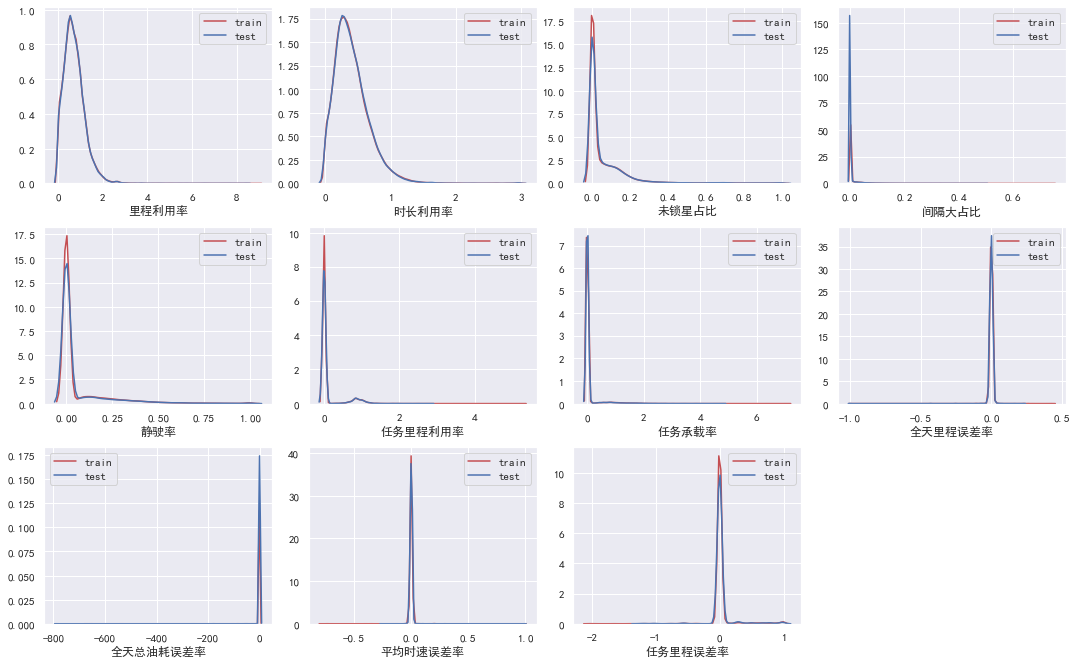

<Figure size 432x288 with 0 Axes>

In [89]:
#可以发现数值类型的特征分布在训练集和测试集上是近似的
plt.figure(figsize=(15, 15))
i = 1
for col in numeric_features:
    plt.subplot(5, 4, i)
    i += 1
    sns.distplot(Train_Total_coded[col], label='train', color='r', hist=False)
    sns.distplot(Test_Total_coded[col], label='test', color='b', hist=False)
plt.tight_layout()
plt.show()
plt.savefig('./训练与测试集数值类型的特征分布比较.jpg')

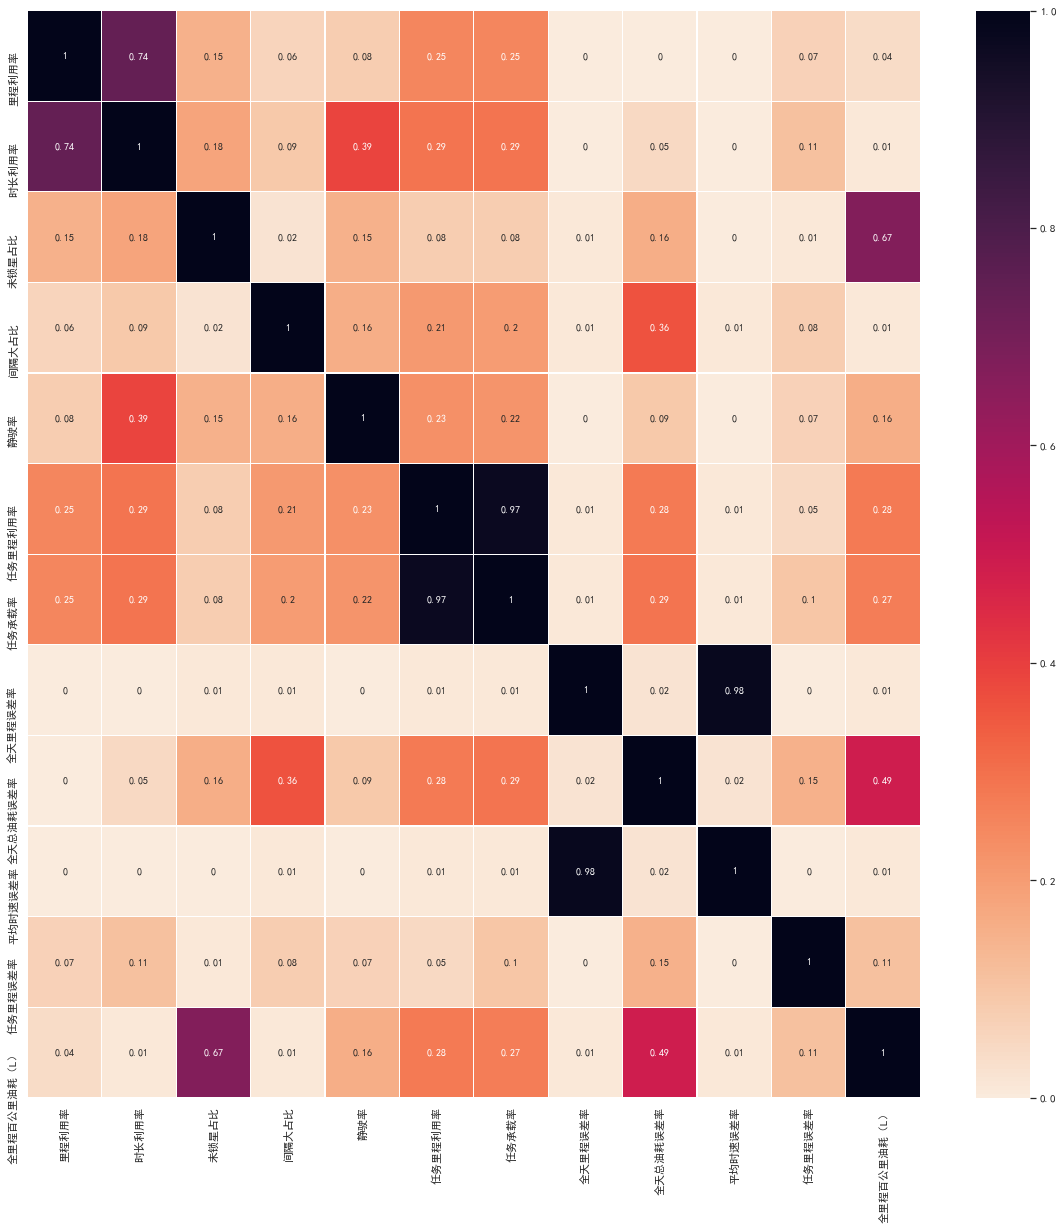

<Figure size 432x288 with 0 Axes>

In [90]:
#从数值特征维度来看 ['里程利用率','时长利用率', '未锁星占比', '间隔大占比', '静驶率', '任务里程利用率', '任务承载率',
#'全天里程误差率', '全天总油耗误差率', '平均时速误差率', '任务里程误差率']和标签的线性相关性（皮尔逊相关系数）不是较为相关的。
corr = Train_Total_coded[numeric_features+['全里程百公里油耗（L）']].corr(method='spearman' )
plt.figure(figsize=(20, 20))
sns.heatmap(abs(np.around(corr,2)), linewidths=0.1, annot=True,cmap=sns.cm.rocket_r)
plt.show()
plt.savefig('./测试集数值类型的特征与标签的线性相关性.jpg')

In [91]:
#下面做了一个油耗与天气的斯皮尔曼秩相关系数，在不同程度的极值干扰下都能有较好的稳定性去衡量变量的相关性。
weather_data = pd.read_excel('beijingweatherhistory.xlsx')
#datasets = pd.read_excel('.\df_conbine7_9.xlsx')
weather_data

,date_parsed_month,date_parsed_day,Temperature (°F)_Max,Temperature (°F)_Avg,Temperature (°F)_Min,DewPoint (°F)_Max,DewPoint (°F)_Avg,DewPoint (°F)_Min,Humidity (%)_Max,Humidity (%)_Avg,Humidity (%)_Min,WindSpeed (mph)_Max,WindSpeed (mph)_Avg,WindSpeed (mph)_Min,Pressure (Hg)_Max,Pressure (Hg)_Avg,Pressure (Hg)_Min,Precipitation (in)_Total
0,7,1,92,83.9,72,65,62.8,59,74,51.1,37,7,4.3,2,29.6,29.5,29.4,0.00
1,7,2,83,78.4,74,66,64.5,63,78,63.3,53,7,5.1,4,29.7,29.6,29.6,0.00
2,7,3,80,75.4,71,69,65.9,62,90,73.6,60,7,3.6,2,29.7,29.7,29.7,0.04
3,7,4,85,78.5,70,69,66.1,64,83,67.0,51,9,4.3,2,29.6,29.5,29.4,0.00
4,7,5,90,80.1,74,69,66.6,64,82,65.5,45,4,3.0,2,29.4,29.4,29.3,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,9,26,78,68.5,59,61,59.6,58,97,76.1,54,7,3.5,0,30.0,29.9,29.9,0.00
88,9,27,77,69.0,61,62,59.4,58,94,73.0,51,7,3.1,0,30.0,29.9,29.9,0.00
89,9,28,77,69.4,62,65,61.5,60,93,76.9,58,7,2.6,0,29.9,29.8,29.8,0.00
90,9,29,65,60.6,55,64,55.4,52,96,82.6,65,7,4.0,2,30.0,29.9,29.8,1.37


In [92]:
b = Train_Total_coded.columns.to_list()

In [93]:
#对编码完成的测试训练数据与天气数据merge合并
Train_Total_coded_w = pd.merge(Train_Total_coded,weather_data,how='left',on = ['date_parsed_month','date_parsed_day'])
Train_Total_coded_w.to_pickle('Train_Total_coded_weath.pkl')
Test_Total_coded_w = pd.merge(Test_Total_coded,weather_data,how='left',on = ['date_parsed_month','date_parsed_day'])
Test_Total_coded_w.to_pickle('Test_Total_coded_weath.pkl')

In [94]:
Train_Total_coded_w.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205811 entries, 0 to 205810
Columns: 402 entries, 登记日期 to Precipitation (in)_Total
dtypes: datetime64[ns](2), float64(81), int64(12), uint8(307)
memory usage: 211.0 MB


In [95]:
Test_Total_coded_w.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68604 entries, 0 to 68603
Columns: 399 entries, 登记日期 to Precipitation (in)_Total
dtypes: datetime64[ns](2), float64(81), int64(12), uint8(304)
memory usage: 70.1 MB


In [96]:
#检查合并的天气数据是否与日期对应上了
#a.loc[(a['date_parsed_month'] == 9)& (a['date_parsed_day'] == 30)]

# Step 4: 特征工程
1) 特征工程

In [136]:
#X_train = Train_Total_coded_w.drop( ['登记日期', 'date_parsed'],axis = 1)
#Train_Total_coded_half = Train_data_coded.drop(['登记日期', 'date_parsed'],axis = 1)
#X_train = Train_Total_coded.drop( ['登记日期', 'date_parsed'],axis = 1)
#X_test = Test_Total_coded_w.drop( [ 'date_parsed'],axis = 1)
#'全里程百公里油耗（L）'

In [140]:
# 训练集和测试集放在一起，方便构造特征
Train_Total_coded_w['train']=1
Test_Total_coded_w['train']=0
data = pd.concat([Train_Total_coded_w, Test_Total_coded_w], ignore_index=True, sort=False)
data.shape

(274415, 404)

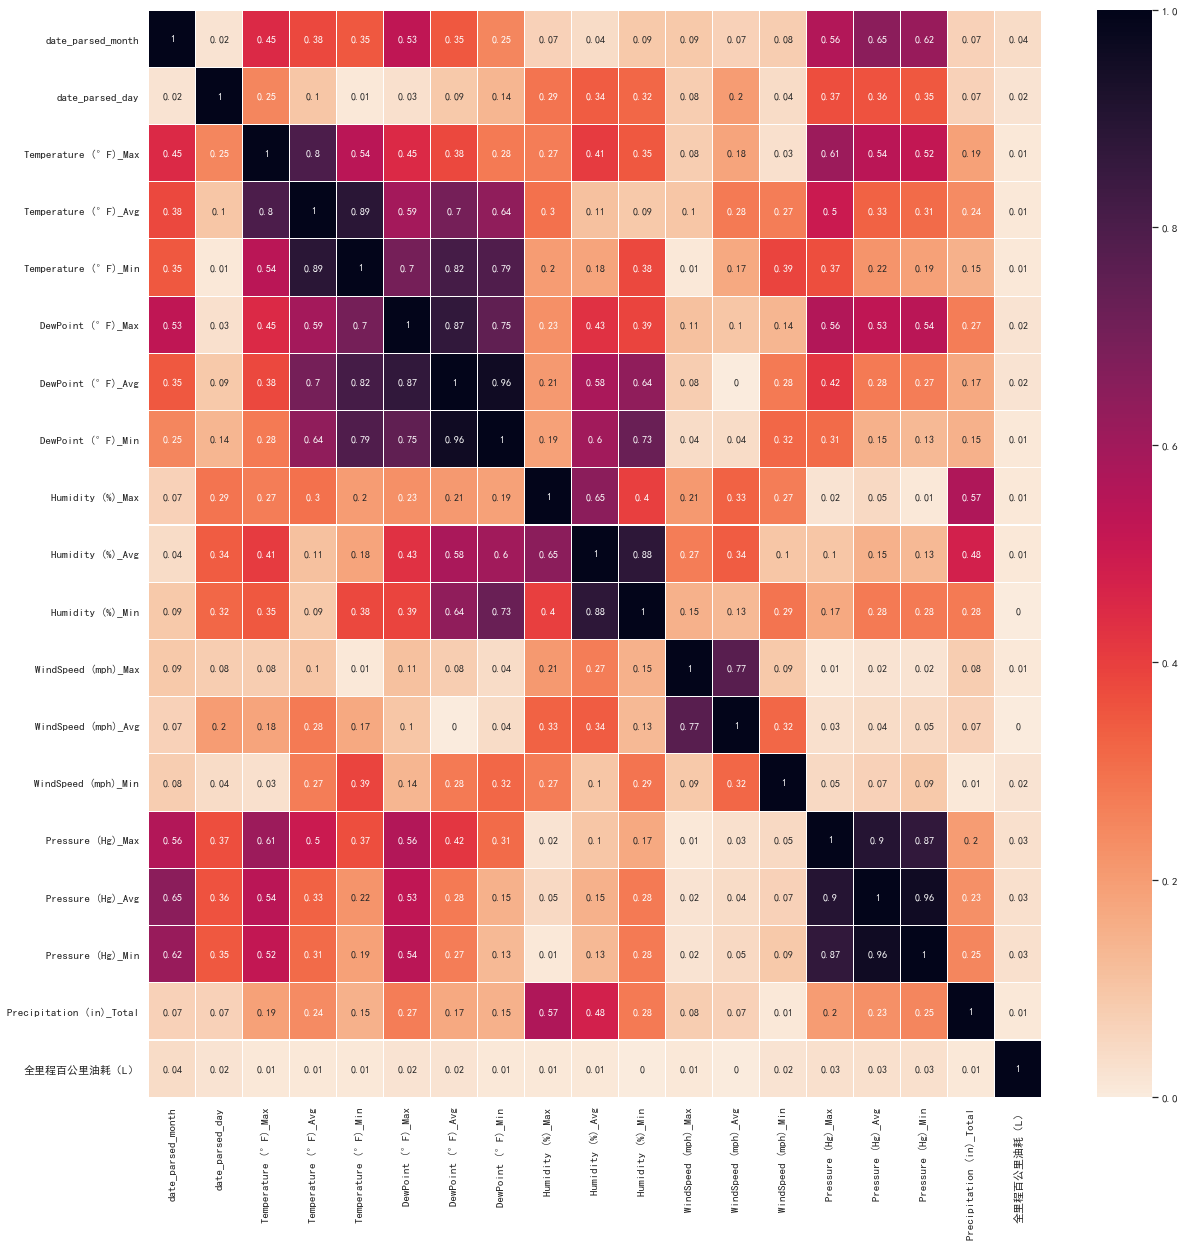

In [141]:
w_corr = Train_Total_coded_w[weather_data.columns.to_list()+['全里程百公里油耗（L）']].corr(method='spearman' )
plt.figure(figsize=(20, 20))
sns.heatmap(abs(np.around(w_corr,2)), linewidths=0.1, annot=True,cmap=sns.cm.rocket_r)
plt.show()

In [253]:
len(col_n_skills)

389

In [254]:
#将全部特征分为驾驶技巧和非驾驶技巧的
col_dri_skills = [ '全天静驶时长','平均时速km/h','最大扭距',
 '平均扭距', '急刹车次数','超速报警次数', '怠速次数',
 '怠速时长mm', '高档低速次数','高档低速累计时长mm',
 '低档高速次数','低档高速累计时长mm',
 '空档滑行次数', '空档滑行时长mm', '每百公里急刹车次数', '静驶率', '怠速次数',
 '怠速时长mm',
 '高档低速次数',
 '高档低速累计时长mm',
 '低档高速次数',
 '低档高速累计时长mm',
 '空档滑行次数',
 '空档滑行时长mm',]
col_n_skills = [i for i in data.columns.to_list() if i not in col_dri_skills]


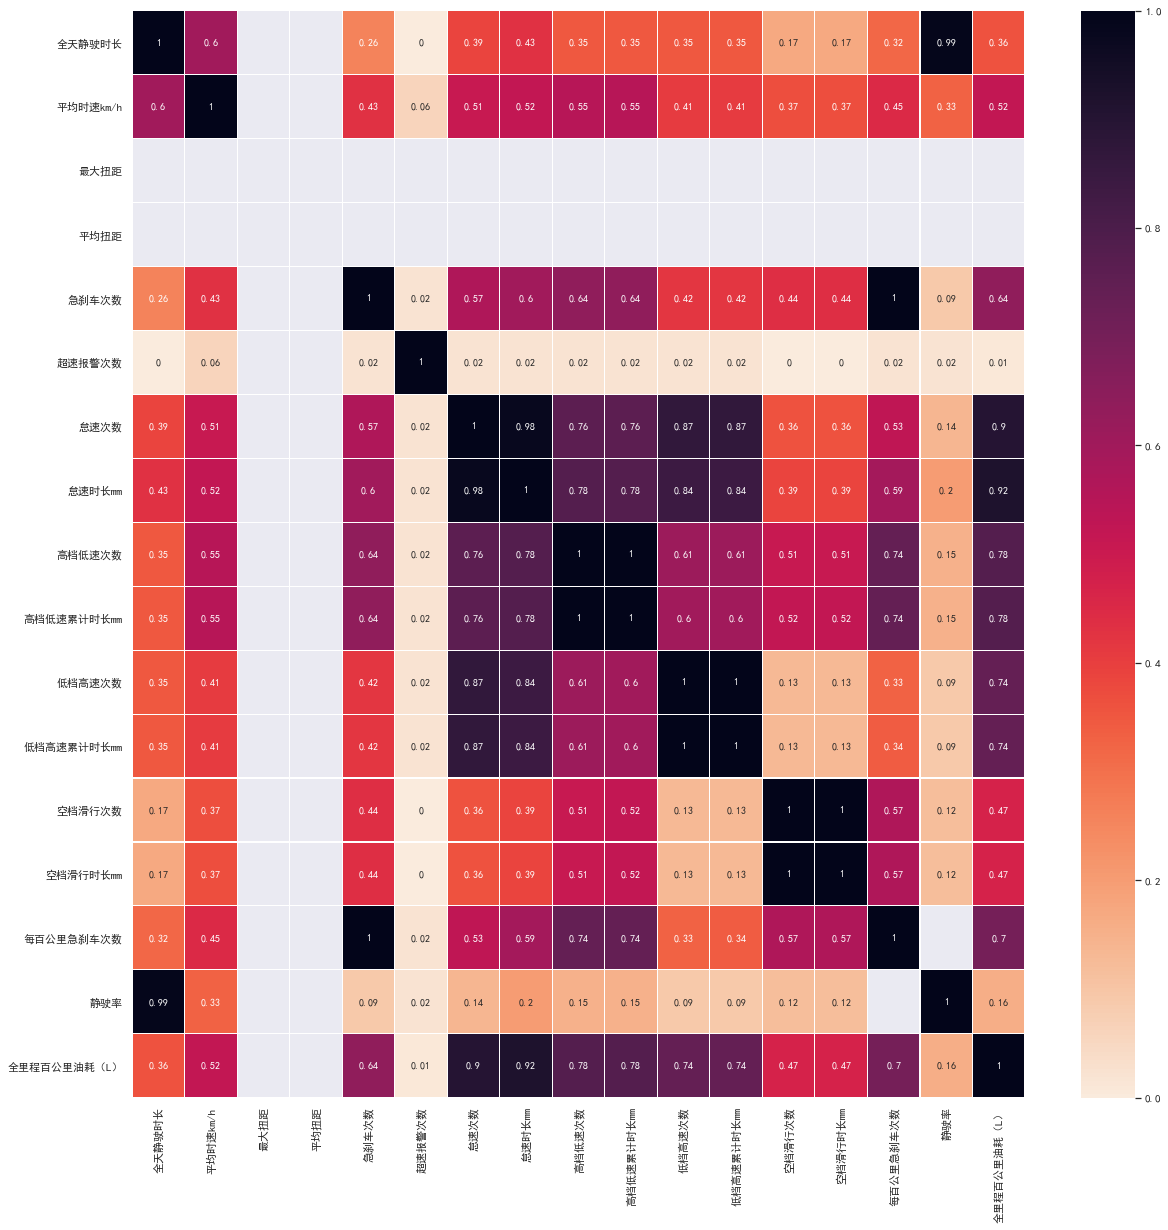

In [144]:
#从驾驶行为的特征中发现许多的强相关性与油耗
s_corr = Train_Total_coded_w[col_dri_skills+['全里程百公里油耗（L）']].corr(method='spearman' )
plt.figure(figsize=(20, 20))
sns.heatmap(abs(np.around(s_corr,2)), linewidths=0.1, annot=True,cmap=sns.cm.rocket_r)
plt.show()

In [145]:
data.columns.to_list()

['登记日期',
 '吨位',
 '当日有派车次数',
 '全天行驶里程km',
 '其中任务行驶里程km',
 '全天运行时长（点火时长）hh',
 '其中任务行驶时长hh',
 '全天静驶时长',
 '平均时速km/h',
 '最大扭距',
 '平均扭距',
 '急刹车次数',
 '超速报警次数',
 '前3日平均运行里程km',
 '前3日日平均运行时长h',
 '近4日平均运行里程km',
 '近4日日平均运行时长h',
 '怠速次数',
 '怠速时长mm',
 '任务百公里油耗（L）',
 '全里程百公里油耗（L）',
 '高档低速次数',
 '高档低速累计时长mm',
 '低档高速次数',
 '低档高速累计时长mm',
 '空档滑行次数',
 '空档滑行时长mm',
 'Can设备状态',
 '油耗量（当天）',
 '市趟次数',
 '一干次数',
 '二干次数',
 '里程标杆值km',
 '时长标杆值h',
 '实际里程参考值km',
 '位置总数',
 '未锁星数',
 '延迟位置数',
 '行驶位置数',
 '间隔大位置数',
 'ACC关位置数',
 '行驶时长',
 '拉直线次数',
 '拉直线总距离',
 '设备序列号',
 '在线时长',
 '里程误差',
 '311/388/29/72批次',
 '294无里程关注',
 '每百公里急刹车次数',
 '任务标准里程(km)',
 '任务GPS里程(km)',
 '任务总包数量',
 '任务总包重量(吨)',
 '全天总油耗验证(L)',
 '平均时速验证(km/h)',
 '数据异常项数',
 '任务数量',
 '派车次数误差',
 'date_parsed',
 '登记日期_year',
 '登记日期_month',
 '登记日期_day',
 '登记日期_dayofweek',
 'date_parsed_year',
 'date_parsed_month',
 'date_parsed_day',
 'date_parsed_dayofweek',
 '设备分类_-1',
 '设备分类_0',
 '设备分类_便携式设备',
 '设备分类_湘邮CAN设备',
 '设备分类_湘邮视频设备',
 '设备分类_老旧设备',
 '设备分类_部标湘邮',
 '设备分类_部标自有',
 '任务

In [146]:
data_ski = data[col_dri_skills].fillna(0)
data_n_ski = data[col_n_skills].fillna(0)
data_n_ski

,登记日期,吨位,当日有派车次数,全天行驶里程km,其中任务行驶里程km,全天运行时长（点火时长）hh,其中任务行驶时长hh,前3日平均运行里程km,前3日日平均运行时长h,近4日平均运行里程km,近4日日平均运行时长h,任务百公里油耗（L）,全里程百公里油耗（L）,Can设备状态,油耗量（当天）,市趟次数,一干次数,二干次数,里程标杆值km,时长标杆值h,实际里程参考值km,位置总数,未锁星数,延迟位置数,行驶位置数,间隔大位置数,ACC关位置数,行驶时长,拉直线次数,拉直线总距离,设备序列号,在线时长,里程误差,311/388/29/72批次,294无里程关注,任务标准里程(km),任务GPS里程(km),任务总包数量,任务总包重量(吨),全天总油耗验证(L),平均时速验证(km/h),数据异常项数,任务数量,派车次数误差,date_parsed,登记日期_year,登记日期_month,登记日期_day,登记日期_dayofweek,date_parsed_year,date_parsed_month,date_parsed_day,date_parsed_dayofweek,设备分类_-1,设备分类_0,设备分类_便携式设备,设备分类_湘邮CAN设备,设备分类_湘邮视频设备,设备分类_老旧设备,设备分类_部标湘邮,设备分类_部标自有,任务数据组合异常标记（邮包）_-1,任务数据组合异常标记（邮包）_无任务,任务数据组合异常标记（邮包）_有数量无重量,任务数据组合异常标记（邮包）_正常,任务数据组合异常标记（设备）_-1,任务数据组合异常标记（设备）_无任务,任务数据组合异常标记（设备）_有派车无里程,任务数据组合异常标记（设备）_正常,任务里程超限异常_-1,任务里程超限异常_无任务,任务里程超限异常_有任务未出班,任务里程超限异常_超限,全里程与任务里程组合异常_-1,全里程与任务里程组合异常_未按照实际情况派车,里程与时速组合异常_-1,里程与时速组合异常_Can设备版本需升级，OBD车速改为GPS车速,里程与时速组合异常_疑似GPS设备跳时导致，需现场检修,急刹车次数值异常_-1,急刹车次数值异常_时长大于等于15次,静驶时长值异常_-1,静驶时长值异常_时长大于等于10小时,静驶时长值异常_时长大于等于15小时,静驶时长点火占比超限_-1,静驶时长点火占比超限_时长小于等于0.5小时,静驶时长点火占比超限_时长小于等于0小时,静驶时长点火占比超限_未出班,静驶时长点火占比超限_超限,平均时速值异常_-1,平均时速值异常_异常，大于等于100km/h,平均时速值异常_异常，大于等于120km/h,平均时速值异常_无平均时速,平均时速值异常_未出班,平均时速值异常_里程<1，异常，小于10km/h,平均时速误差超限_-1,平均时速误差超限_无平均时速,平均时速误差超限_未出班,平均时速误差超限_超限,全里程百公里油耗值异常_-1,全里程百公里油耗值异常_数据异常，大于等于18L,全里程百公里油耗值异常_数据异常，大于等于30L,全里程百公里油耗值异常_数据异常，大于等于40L,全里程百公里油耗值异常_数据异常，大于等于45L,全里程百公里油耗值异常_数据异常，大于等于50L,全里程百公里油耗值异常_数据异常，大于等于70L,全里程百公里油耗值异常_无百公里油耗,全里程百公里油耗值异常_未出班,全里程百公里油耗值异常_超限,总油耗误差超限_-1,总油耗误差超限_无百公里油耗,总油耗误差超限_未出班,总油耗误差超限_超限,里程误差超限_-1,里程误差超限_无平均时速,里程误差超限_未出班,里程误差超限_超限,异常数据说明_-1,异常数据说明_疑似接长线,异常数据说明_疑似车辆速度传感器故障,异常数据说明_车辆状态：在调拨中,943速递批次_-1,943速递批次_943速递,单位组_-1,单位组_专业局,单位组_其他,单位组_经营单位,单位组_运输单位,急刹车次数是否异常_-1,急刹车次数是否异常_否,急刹车次数是否异常_是,118重汽_-1,118重汽_118重汽,930速递_-1,930速递_930速递,报废状态_-1,报废状态_待报废,24小时内离线_-1,24小时内离线_0,24小时内离线_在线,24小时内离线_离线,设备状态_-1,设备状态_0908已报废或待报废不常用,设备状态_CAN天线故障,设备状态_CAN未适配,设备状态_CAN疑似设备被拔或停放,设备状态_GPS失步,设备状态_GPS接线问题,设备状态_GPS未绑定设备,设备状态_GPS跳时,设备状态_备用车,设备状态_已报废或不常用,设备状态_已报废或待报废不常用,设备状态_已现场查看,设备状态_异常,设备状态_异常：CAN天线故障,设备状态_异常：CAN未适配,设备状态_异常：CAN疑似设备被拔或停放,设备状态_异常：GPS失步,设备状态_异常：GPS接线问题,设备状态_异常：GPS未绑定设备,设备状态_异常：GPS跳时,设备状态_异常：归班停驻,设备状态_归班停驻,设备状态_待定,设备状态_无需装GPS,设备状态_暂未分配单位,设备状态_未绑定设备,设备状态_未装,设备状态_检查用车,设备状态_正常,设备类型_-1,设备类型_0,设备类型_博士后,设备类型_湘邮CAN设备,设备类型_湘邮便携,设备类型_湘邮时刻I,设备类型_湘邮部标视频,设备类型_湘邮部标视频II,设备类型_湘邮部标视频III,设备类型_部标-湘邮,设备类型_部标-自有,能源类型_-1,能源类型_柴油,能源类型_汽油,能源类型_蓄电池,单位分组_-1,单位分组_专业局,单位分组_其他,单位分组_经营单位,单位分组_运输单位,车型_-1,车型_12吨,车型_2吨以下,车型_35吨,车型_3吨,车型_4吨,车型_5吨,车型_8吨,车辆名称_-1,车辆名称_上元,车辆名称_东南,车辆名称_东南富利卡,车辆名称_东南得利卡,车辆名称_东南菱利,车辆名称_东风,车辆名称_五菱,车辆名称_北京,车辆名称_北汽福田,车辆名称_大通,车辆名称_帕拉丁,车辆名称_庆铃,车辆名称_开沃,车辆名称_欧曼,车辆名称_汕德卡,车辆名称_江铃,车辆名称_福田,车辆名称_租赁电车未安装设备,车辆名称_解放,车辆名称_金杯,车辆名称_金龙,车辆名称_长安,车辆名称_陕汽,车辆名称_鸿雁,配属单位_-1,配属单位_业务代理局,配属单位_北京国际邮电局,配属单位_北京市东城区邮电局,配属单位_北京市丰台区邮电局,配属单位_北京市大兴区邮政局,配属单位_北京市密云区邮政局,配属单位_北京市平谷区邮政局,配属单位_北京市延庆县邮政局,配属单位_北京市怀柔区邮政局,配属单位_北京市房山区邮政局,配属单位_北京市昌平区邮政局,配属单位_北京市朝阳区邮电局,配属单位_北京市海淀区邮电局,配属单位_北京市石景山区邮电局,配属单位_北京市西城区邮电局,配属单位_北京市通信局,配属单位_北京市通州区邮政局,配属单位_北京市邮政速递物流公司,配属单位_北京市邮票公司,配属单位_北京市门头沟区邮政局,配属单位_北京市顺义区邮政局,配属单位_北京报刊发行局,配属单位_北京报刊零售公司,配属单位_北京邮区中心局,配属单位_北京邮政信息技术局,配属单位_北京邮政商业信函局,配属单位_北京邮政实业集团公司,配属单位_北京邮政物流局,配属单位_北京邮政电商分销局,配属单位_同城中心,配属单位_同城运营中心,配属单位_国际分公司,配属单位_机关（借总部）,配属单位_物流分公司,配属单位_电商营销中心,配属单位_留,配属单位_科研院,配属单位_航空邮件处理中心,配属单位_行邮集散处理中心,配属单位_车辆管理中心,配属单位_运输公司,规格型号_-1,规格型号_BJ5089XYZ,规格型号_BJ5129XYZ,规格型号_CA5041XXYP40K2L1E4A84-3,规格型号_DN5020XYZ4B,规格型号_DN5020XYZ4B1,规格型号_DN6442B,规格型号_JX5062XYZTG24,规格型号_MS5063XYZF,规格型号_MS5102XYZD1,规格型号_MS5105XYZ,规格型号_SY5033XYZ-USBH,规格型号_SY5033XYZ-WSBH,规格型号_ZN6453WAG3,规格型号_东南DN5020XYZ3,规格型号_东南DN5020XYZ3B,规格型号_东南DN5026XYZB,规格型号_东南DN5026XYZCJ,规格型号_东南DN5028XYZ3AB,规格型号_东南DN5028XYZL,规格型号_东南DN6492,规格型号_东南牌DN5020XYZ3B,规格型号_东南牌DN5020XYZ4B1,规格型号_东南牌DN5020XYZ5,规格型号_东南牌DN5020XYZ5(2座),规格型号_东南牌DN5020XYZ5(5座),规格型号_东南牌DN5020XYZ52,规格型号_东南牌DN5025XYZB,规格型号_东南牌DN5026XYZ3,规格型号_东南牌DN5026XYZCJ,规格型号_东南牌DN6492L3,规格型号_东南牌DN6492L4PB,规格型号_东南牌DN6492L5PB,规格型号_尼桑牌ZN6453WAG3,规格型号_尼桑牌ZN6455W1G5,规格型号_福田牌BJ5023XYZEV1,规格型号_福田牌BJ5069XYZ-A1,规格型号_菱利DN5028XYZ3A,规格型号_解放牌CA5063XYZPK45L2E1,规格型号_金旅牌XML5031XYZ28,规格型号_金杯SY5031XYZ,规格型号_金杯SY5033XYZ-U

In [147]:
## 由于power 特征的分布特性，这里对于其进行log变化,全里程百公里油耗（L）'油耗类和电量类是相似的，均值与标准差正相关，误差越来越大
data['油耗量（当天）'] = np.log1p(data['油耗量（当天）'])
data['任务百公里油耗（L）'] = np.log1p(data['任务百公里油耗（L）'])
data['全里程百公里油耗（L）'] = np.log1p(data['全里程百公里油耗（L）'])

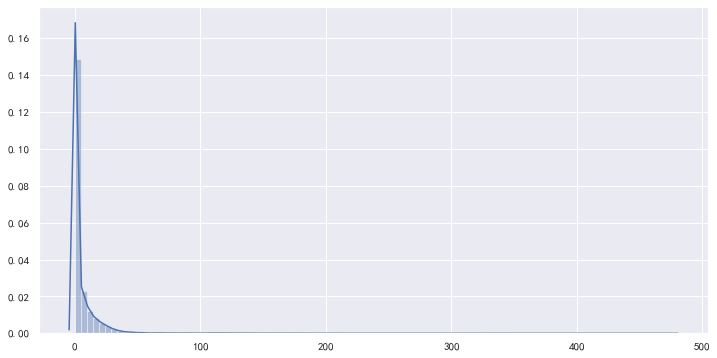

In [148]:
plt.figure(figsize=(12,6))
sns.distplot(Train_Total_coded_w[ '油耗量（当天）'].values ,bins=100)
plt.show()

In [249]:
#a = data.drop(data.loc[data['油耗量（当天）']==0])

In [ ]:
plt.figure(figsize=(12,6))
sns.distplot(a['油耗量（当天）'].values,bins=10)
#sns.distplot(data['任务百公里油耗（L）'].values ,bins=10)
#sns.distplot(data['全里程百公里油耗（L）'].values ,bins=50)
plt.show()

In [150]:
#使用时长生成特征
data['used_time'] = (pd.to_datetime(data['date_parsed'], format='%Y%m%d', errors='coerce') - 
                            pd.to_datetime(data['登记日期'], format='%Y%m%d', errors='coerce')).dt.days

# 看一下空数据，有 15k 个样本的时间是有问题的，我们可以选择删除，也可以选择放着（不管或者作为一个单独类别）。
# XGBoost 之类的决策树，其本身就能处理缺失值，所以可以不用管；
data['used_time'].isnull().sum()


16

In [151]:
#data = data.drop( ['登记日期', 'date_parsed'],axis=1)
data.info()
train = data[data['train']==1]
test = data[data['train']==0]
print(train.shape)
print(test.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274415 entries, 0 to 274414
Columns: 405 entries, 登记日期 to used_time
dtypes: datetime64[ns](2), float64(87), int64(13), uint8(303)
memory usage: 292.8 MB
(205811, 405)
(68604, 405)


In [184]:
test[['全里程百公里油耗（L）']]

,全里程百公里油耗（L）
205811,0.000000
205812,3.178470
205813,0.000000
205814,2.809403
205815,0.000000
...,...
274410,0.000000
274411,0.000000
274412,0.000000
274413,0.000000


In [252]:
#categorical_cols = train.select_dtypes(include = 'object').columns
#categorical_cols
## 选择特征列
#feature_cols = [col for col in data.columns if col not in ['SaleID','name','regDate','creatDate','price','model','brand',
#            'regionCode','seller','bodyType','fuelType','offerType','train']]

#feature_cols = [col for col in feature_cols if col not in date_features[1:]]油耗量（当天）,任务百公里油耗（L）,全里程百公里油耗（L）
feature_cols = [col for col in data.columns if col not in ['油耗量（当天）','任务百公里油耗（L）','全里程百公里油耗（L）','登记日期', 'date_parsed']]
## 提前特征列，标签列构造训练样本和测试样本
X_data = train[feature_cols]
Y_data = train['全里程百公里油耗（L）']

X_test  = test[feature_cols]
Y_tsst = test[['全里程百公里油耗（L）']]
print('X train shape:',X_data.shape)
print('X test shape:',X_test.shape)



X train shape: (205811, 400)
X test shape: (68604, 400)


In [260]:
X_data = X_data.drop( ['登记日期', 'date_parsed'],axis = 1)
X_test = X_test.drop( ['登记日期', 'date_parsed'],axis = 1)

KeyError: "['登记日期' 'date_parsed'] not found in axis"

In [ ]:
X_test.select_dtypes(include = 'datetime64').columns
col_n_skills

In [256]:
'''
from sklearn import svm, datasets
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
#iris = datasets.load_iris()
#parameters = feature_cols
#svc = svm.SVC()
#clf = GridSearchCV(RandomForestRegressor, parameters)
#clf.fit(RandomForestRegressor, parameters)
grid = GridSearchCV(
    RandomForestRegressor,
    param_grid,
    cv=5,
    scoring="neg_log_loss", 
    verbose=3,
    n_jobs=4
)
#gscv = GridSearchCV(RandomForestRegressor, param(), cv=4, verbose=2)
grid.fit(X_data1, Y_data1)
'''

'\nfrom sklearn import svm, datasets\nfrom sklearn.ensemble import RandomForestRegressor\nfrom sklearn.model_selection import GridSearchCV\n#iris = datasets.load_iris()\n#parameters = feature_cols\n#svc = svm.SVC()\n#clf = GridSearchCV(RandomForestRegressor, parameters)\n#clf.fit(RandomForestRegressor, parameters)\ngrid = GridSearchCV(\n    RandomForestRegressor,\n    param_grid,\n    cv=5,\n    scoring="neg_log_loss", \n    verbose=3,\n    n_jobs=4\n)\n#gscv = GridSearchCV(RandomForestRegressor, param(), cv=4, verbose=2)\ngrid.fit(X_data1, Y_data1)\n'

# 对非驾驶技巧进行随机森林回归，首先是随机森林参数选择

In [261]:
#使用gridsearchcv探索n_estimators的最佳值
def random_forest_parameter_tuning1(feature_data, label_data, test_feature):
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import mean_squared_error
    from sklearn.model_selection import GridSearchCV
 
    X_train, X_test, y_train, y_test = train_test_split(feature_data, label_data, test_size=0.23)
    param_test1 = {
        'n_estimators': range(10, 1001, 50)
    }
    model = GridSearchCV(estimator=RandomForestRegressor(
        min_samples_split=100, min_samples_leaf=20, max_depth=8, max_features='sqrt',
        random_state=10), param_grid=param_test1, cv=5
    )
    model.fit(X_train, y_train)
    # 对测试集进行预测
    y_pred = model.predict(X_test)
    # 计算准确率
    MSE = mean_squared_error(y_test, y_pred)
    RMSE = np.sqrt(MSE)
    print(RMSE)
    return model.best_score_, model.best_params_

In [262]:
#最佳的弱学习器迭代次数
'''
0.32935119957561754
(0.9423338758237628, {'n_estimators': 410})
'''
random_forest_parameter_tuning1(X_data1,Y_data1,feature_cols)

0.32935119957561754


(0.9423338758237628, {'n_estimators': 410})

In [267]:
# 对决策树最大深度 max_depth 和内部节点再划分所需要的最小样本数求最佳值
def random_forest_parameter_tuning2(feature_data, label_data, test_feature):
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import mean_squared_error
    from sklearn.model_selection import GridSearchCV
 
    X_train, X_test, y_train, y_test = train_test_split(feature_data, label_data, test_size=0.23)
    param_test2 = {
        'max_depth': range(3, 14, 2),
        'min_samples_split': range(50, 201, 20)
    }
    model = GridSearchCV(estimator=RandomForestRegressor(
        n_estimators=70, min_samples_leaf=20, max_features='sqrt', oob_score=True,
        random_state=10), param_grid=param_test2, cv=5
    )
    model.fit(X_train, y_train)
    # 对测试集进行预测
    y_pred = model.predict(X_test)
    # 计算准确率
    MSE = mean_squared_error(y_test, y_pred)
    RMSE = np.sqrt(MSE)
    print(RMSE)
    return model.best_score_, model.best_params_

In [ ]:
random_forest_parameter_tuning2(X_data1,Y_data1,feature_cols)

In [263]:
#[(train['全里程百公里油耗（L）']<=18)]
from sklearn.ensemble import RandomForestRegressor
rfc = RandomForestRegressor(n_estimators = 410,n_jobs = -1 ,random_state = 20,min_samples_leaf = 5,max_features = 5 )
X_data1 = X_data[feature_cols].fillna(0)
Y_data1 = Y_data.fillna(0)
rfc.fit(X_data1,Y_data1)

RandomForestRegressor(max_features=5, min_samples_leaf=5, n_estimators=410,
                      n_jobs=-1, random_state=20)

In [248]:
'''
#随机森林回归
import matplotlib as mpla
import numpy as np
import warnings
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
  
#忽略一些版本不兼容等警告
warnings.filterwarnings("ignore")
  
#产生心状坐标
t = np.arange(0,2*np.pi,0.1)
x = 16*np.sin(t)**3
x=x[:, np.newaxis]
y = 13*np.cos(t)-5*np.cos(2*t)-2*np.cos(3*t)-np.cos(4*t)
y[::7]+= 3* (1 - np.random.rand(9))                      #增加噪声，在每数2个数的时候增加一点噪声
  
#传统决策树线性回归,随机森林回归，极端森林回归
rf1=DecisionTreeRegressor()
rf2=RandomForestRegressor(n_estimators=1000)           #一般来说n_estimators越大越好，运行结果呈现出的两种结果该值分别是10和1000
rf3=ExtraTreesRegressor()
  
  
#三种算法的预测
y_rf1 =rf1.fit(X_data1,Y_data1).predict(X_data1)
y_rf2 =rf2.fit(X_data1,Y_data1).predict(X_data1)
y_rf3 =rf3.fit(X_data1,Y_data1).predict(X_data1)
  
#为了后面plt.text定位
x1_min, x1_max = X_data1[:].min(), X_data1[:].max()         
x2_min, x2_max = Y_data1[:].min(), Y_data1[:].max()
  
mpl.rcParams['font.sans-serif'] = [u'SimHei']            #用来正常显示中文标签   
mpl.rcParams['axes.unicode_minus'] = False
  
plt.scatter(X_data1, Y_data1, color='darkorange', label='data') 
plt.hold('on')
  
plt.plot(X_data1, y_rf1, color='b',  label='DecisionTreeRegressor') 
plt.plot(X_data1, y_rf2, color='g',  label='RandomForestRegressor') 
plt.plot(X_data1, y_rf3, color='r',  label='ExtraTreesRegressor')
  
plt.xlabel('data_x') 
plt.ylabel('data_y') 
plt.title('python_machine-learning_RandomForest(n_estimators=1000)-----心状学习') 
plt.legend()
plt.text(x1_max-4, x2_max-1, u'$o---Sample-Point$')
plt.show()
'''

'\n#随机森林回归\nimport matplotlib as mpla\nimport numpy as np\nimport warnings\nimport matplotlib.pyplot as plt\nfrom sklearn.tree import DecisionTreeRegressor\nfrom sklearn.ensemble import RandomForestRegressor\nfrom sklearn.ensemble import ExtraTreesRegressor\n  \n#忽略一些版本不兼容等警告\nwarnings.filterwarnings("ignore")\n  \n#产生心状坐标\nt = np.arange(0,2*np.pi,0.1)\nx = 16*np.sin(t)**3\nx=x[:, np.newaxis]\ny = 13*np.cos(t)-5*np.cos(2*t)-2*np.cos(3*t)-np.cos(4*t)\ny[::7]+= 3* (1 - np.random.rand(9))                      #增加噪声，在每数2个数的时候增加一点噪声\n  \n#传统决策树线性回归,随机森林回归，极端森林回归\nrf1=DecisionTreeRegressor()\nrf2=RandomForestRegressor(n_estimators=1000)           #一般来说n_estimators越大越好，运行结果呈现出的两种结果该值分别是10和1000\nrf3=ExtraTreesRegressor()\n  \n  \n#三种算法的预测\ny_rf1 =rf1.fit(X_data1,Y_data1).predict(X_data1)\ny_rf2 =rf2.fit(X_data1,Y_data1).predict(X_data1)\ny_rf3 =rf3.fit(X_data1,Y_data1).predict(X_data1)\n  \n#为了后面plt.text定位\nx1_min, x1_max = X_data1[:].min(), X_data1[:].max()         \nx2_min, x2_max = Y_data1[


X_test1 = X_test[feature_cols].fillna(0)

Y_test1  = Y_tsst[['全里程百公里油耗（L）']].fillna(0)

y_predict = rfc.predict(X_test1)

In [265]:
#consumption fuel prediction accuracy
rfc.score(X_test1,Y_test1)

0.9392765417145541

In [218]:
imp = rfc.feature_importances_
imp

array([9.42997643e-03, 2.04692096e-03, 1.42576835e-02, 1.86196842e-03,
       1.70115515e-02, 2.21022290e-03, 5.48665350e-03, 1.48583491e-02,
       0.00000000e+00, 0.00000000e+00, 3.12924672e-02, 3.24511191e-06,
       6.31764185e-03, 8.04847788e-03, 7.43919208e-03, 6.90947215e-03,
       8.54342774e-02, 7.85861057e-02, 5.32993561e-02, 4.07420842e-02,
       5.13652291e-02, 4.19130519e-02, 1.11132058e-02, 1.00303848e-02,
       3.44066525e-02, 8.92653900e-04, 4.99594879e-04, 0.00000000e+00,
       1.17159607e-02, 6.43611391e-03, 1.46347633e-02, 1.61821516e-02,
       3.70544061e-02, 1.54664070e-02, 2.52248047e-02, 3.19139260e-03,
       6.30658032e-03, 1.00415678e-02, 5.70664246e-05, 4.62003641e-05,
       7.01897902e-03, 1.47857751e-02, 2.68317651e-03, 8.17543102e-03,
       5.82566001e-04, 8.29106788e-04, 2.33183526e-04, 2.99835548e-04,
       4.04389438e-04, 2.88925812e-04, 9.02720823e-03, 1.90767354e-03,
       2.82468329e-03, 3.95031184e-04, 0.00000000e+00, 7.57919186e-03,
      

In [220]:
names = X_data1.columns.values.tolist()  
names

['吨位',
 '当日有派车次数',
 '全天行驶里程km',
 '其中任务行驶里程km',
 '全天运行时长（点火时长）hh',
 '其中任务行驶时长hh',
 '全天静驶时长',
 '平均时速km/h',
 '最大扭距',
 '平均扭距',
 '急刹车次数',
 '超速报警次数',
 '前3日平均运行里程km',
 '前3日日平均运行时长h',
 '近4日平均运行里程km',
 '近4日日平均运行时长h',
 '怠速次数',
 '怠速时长mm',
 '高档低速次数',
 '高档低速累计时长mm',
 '低档高速次数',
 '低档高速累计时长mm',
 '空档滑行次数',
 '空档滑行时长mm',
 'Can设备状态',
 '市趟次数',
 '一干次数',
 '二干次数',
 '里程标杆值km',
 '时长标杆值h',
 '实际里程参考值km',
 '位置总数',
 '未锁星数',
 '延迟位置数',
 '行驶位置数',
 '间隔大位置数',
 'ACC关位置数',
 '行驶时长',
 '拉直线次数',
 '拉直线总距离',
 '设备序列号',
 '在线时长',
 '里程误差',
 '311/388/29/72批次',
 '294无里程关注',
 '每百公里急刹车次数',
 '任务标准里程(km)',
 '任务GPS里程(km)',
 '任务总包数量',
 '任务总包重量(吨)',
 '全天总油耗验证(L)',
 '平均时速验证(km/h)',
 '数据异常项数',
 '任务数量',
 '派车次数误差',
 '登记日期_year',
 '登记日期_month',
 '登记日期_day',
 '登记日期_dayofweek',
 'date_parsed_year',
 'date_parsed_month',
 'date_parsed_day',
 'date_parsed_dayofweek',
 '设备分类_-1',
 '设备分类_0',
 '设备分类_便携式设备',
 '设备分类_湘邮CAN设备',
 '设备分类_湘邮视频设备',
 '设备分类_老旧设备',
 '设备分类_部标湘邮',
 '设备分类_部标自有',
 '任务数据组合异常标记（邮包）_-1',
 '任务数据组合异常标记（邮包）_无任务',
 '任务数据组合异常标记（邮包）_有数量无重量',
 

OSError: [Errno 22] Invalid argument: './unskills Importance of Each Feature.png'

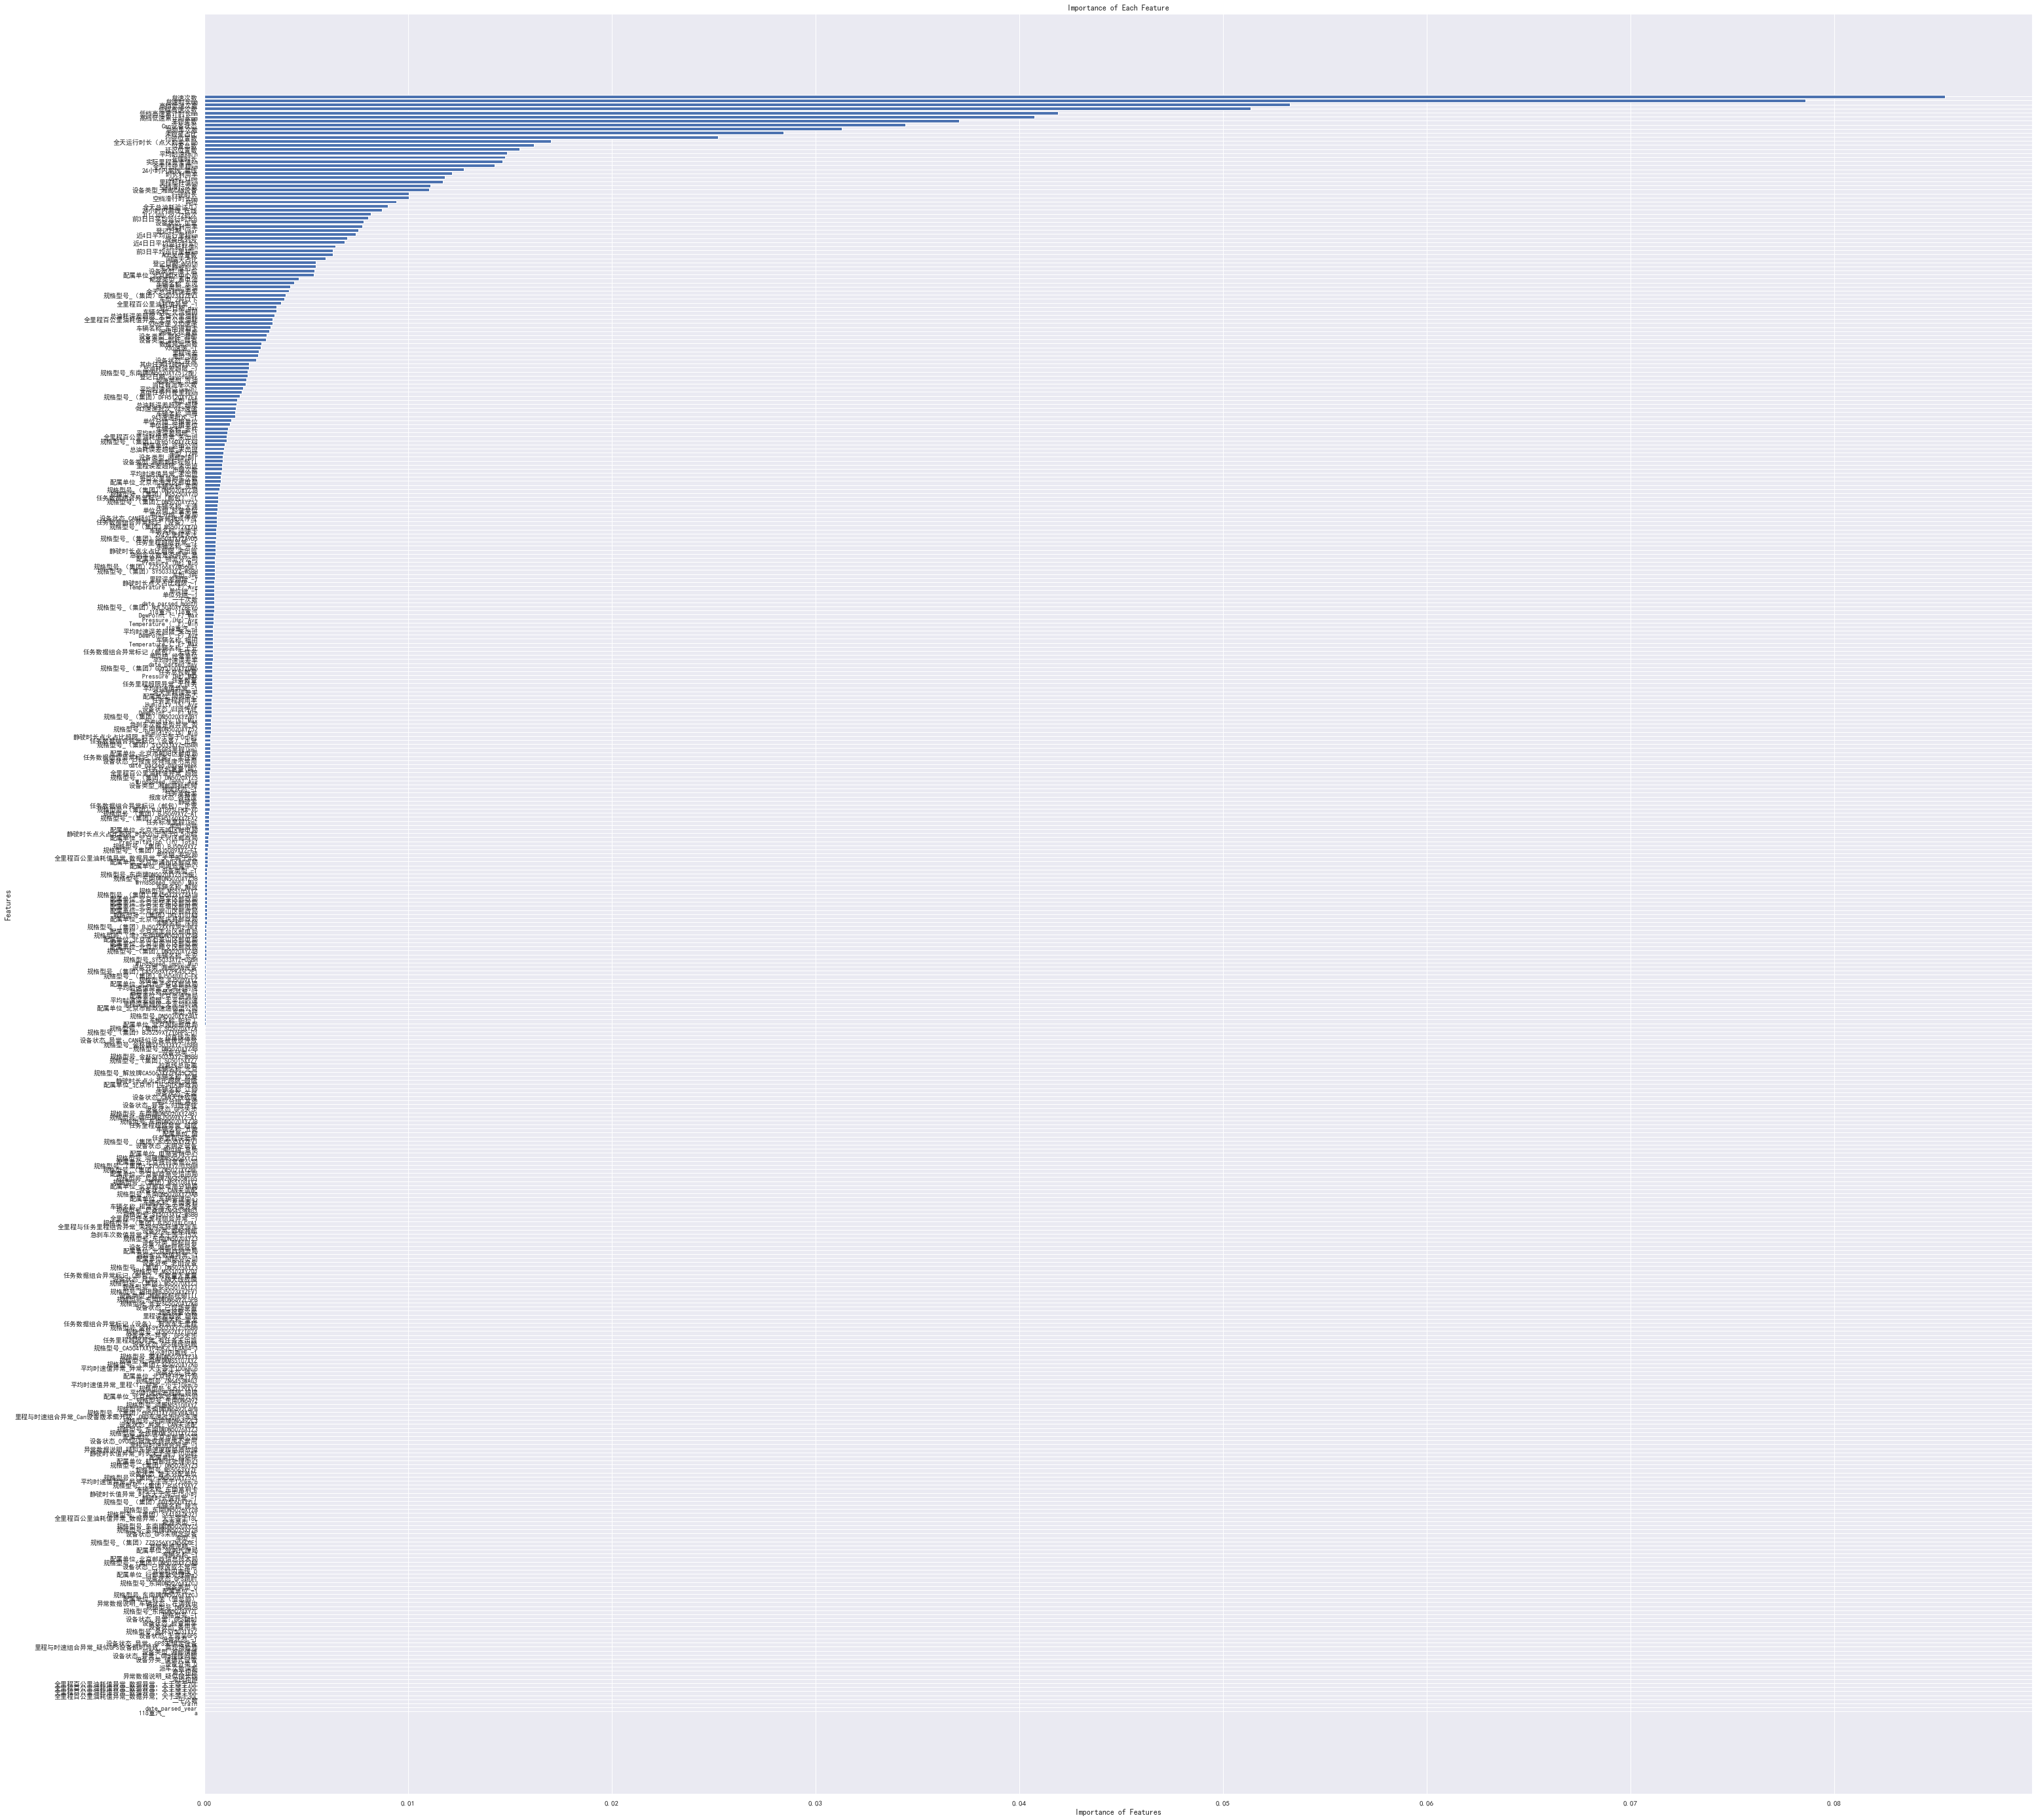

In [235]:
zip(imp,names)
imp,names = zip(*sorted(zip(imp,names)))

fig = plt.figure(figsize=(50,50))
plt.barh(range(len(names)),imp,align='center')
plt.yticks(range(len(names)),names)
plt.rcParams['font.sans-serif'] = ['SimHei'] # 显示中文
plt.xlabel('Importance of Features')
plt.ylabel('Features')
#plt.xticks(fontsize=20)
plt.yticks(fontsize=10)

#for a,b in zip(imp,names):
#    plt.text(a+0.05, b, '%.3f' % a, ha='center', va= 'bottom',fontsize=7)
    
plt.title('Importance of Each Feature')
#plt.savefig("./unskills Importance of Each Feature.png",dpi=200)
#plt.savefig("filename.png")
plt.show()

In [240]:
indices = np.argsort(imp)[::-1]
for f in range(X_data1.shape[1]):
    print(imp[indices[f]])

0.08543427740809428
0.07858610569593057
0.053299356067605386
0.05136522905084719
0.04191305191519612
0.040742084201278575
0.037054406061462
0.03440665247693266
0.031292467174184956
0.02843086034258357
0.02522480471892591
0.017011551477300203
0.016182151588097583
0.015466406992684766
0.014858349074038832
0.014785775083191746
0.014634763341285268
0.01425768349497637
0.012758796308235785
0.012170479133625099
0.011805570907268881
0.011715960656752926
0.011113205769516146
0.011033118177606936
0.010041567762903962
0.010030384811356902
0.009429976433934225
0.009027208233825275
0.008731907166941815
0.008175431018186699
0.00804847787657294
0.00783775213306134
0.00777660260232076
0.007579191862822043
0.007439192077718098
0.007018979017572875
0.006909472152938505
0.0064361139144212265
0.006317641845537225
0.006306580322766068
0.005966122982317939
0.0054890631724157585
0.005486653501276261
0.005405391069050893
0.005379420535121448
0.004641442010638935
0.004407706006725578
0.00421592942936988
0.004

In [ ]:
## 绘制标签的统计图，查看标签分布
plt.figure(figsize=(8,4))
sns.distplot(Y_data,bins=100)
plt.show()
plt.figure(figsize=(8,6))\+
Y_data.plot.box()
plt.show()

In [ ]:
Y_data_log = np.log1p(Y_data)
## 绘制标签的统计图，查看标签log分布
plt.figure(figsize=(12,6))
sns.distplot(Y_data_log,bins=100)
plt.show()

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
# 使用0-1缩放进行预处理
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)